# Klasse E  Versterkers

In [2]:
from cursusdef import *

In de vorige hoofdstukken hebben we de C en F versterkers besproken. Dit zijn hoogfrequent versterkers met 1 vermogen transistor in de vermogentrap. 

In dit hoofdstuk bestuderen we de klasse E versterker. Ook Klasse E versterkers zijn resonante versterkers die bestaan uit een LRC trilkring (of meerdere LC kringen) die aangestuurd wordt door een enkele transistor. Als een gevolg hiervan werkt deze versterker op een vaste frequentie of binnen een zeer beperkte bandbreedte rond deze centrale frequentie. Deze bandbreedte is typisch maximaal 1$ \% $  van de resonantie frequentie.
In {numref}`vermogenversterkersE` geven we een overzicht van deze verschillende versterkers.

:::{list-table} Indeling van de vermogenversterkers
:header-rows: 1
:name: vermogenversterkersE

* - 
  - laagfrequent of breedband
  - hoogfrequent of resonant
* - 1 transistor in de vermogentrap
  - Klasse A
  - Klasse C <BR> Klasse F <BR>**Klasse E**
* - 2 of meer  transistors in de vermogentrap
  - Klasse B  <BR> Klasse G
  - Klasse D
:::

{numref}`efig0` toont het basisschema van de klasse E versterker. Hierin herkennen we een serie resonante kring ($C_2 L_2$) die de belasting $R_L$ aanstuurt. Het spoel $L_1$ voorziet dat de stroom van de voeding $V_{DD}$ naar de ingang van de seriekring redelijk constant wordt gehouden terwijl de spanning aan deze ingang kan varieren. De condensator $C_1$ voorziet een AC stroompad naar de grond in het geval dat de transistor niet in geleiding is.

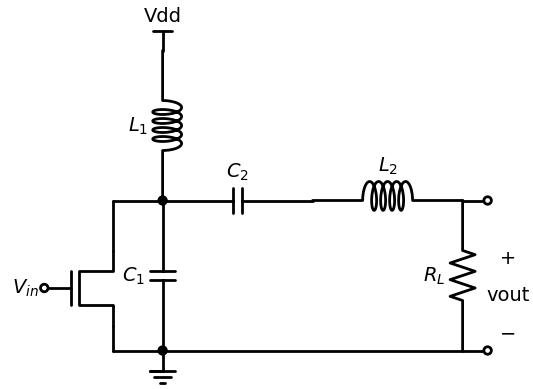

In [29]:
with schemdraw.Drawing() as d:
    d += ( Vdd( label='Vdd'))
    d += (L1 := Inductor2( d='down', label=r'$L_1$'))
    d += ( Dot())
    d += (C2 := Capacitor( d='right', label=r'$C_2$'))
    d += (L2 := Inductor2( d='right', label=r'$L_2$'))
    d += (R := Resistor( d='down', label=r'$R_L$'))
    d += ( Line( xy=R.start, d='right', l=0.5))
    d += (dot := Dot(open=True,))
    d += ( Line(xy=R.end, d='right',l=0.5))
    d += ( Dot(open=True,))
    d += ( Line(xy=R.end, d='left', tox=C2.start))
    d += ( Dot())
    d += ( Gap( d='down', xy= dot.start, toy= R.end, label=['+','vout','−'],lblofst=0.4))
    d += (C1 := Capacitor( d='down',xy=L1.end,toy=R.end, label=r'$C_1$'))
    d += ( Ground())
    d += ( Line( d='left', l=1))
    d += ( Line( d='up', l=0.5))
    d += (T := NFet( d='left', lftlabel=r'$V_{in}$'))
    d += ( Line( d='up',toy=R.start))
    d += ( Line(tox=L1.end, d='right'))
    d += ( Dot(open=True, xy=T.gate))

Voor de praktisch implementatie mag de volgorde van C<sub>2</sub> en L<sub>2</sub> omwisseld worden. Dit heeft geen enkele invloed op de werking van de seriekring.

De klasse E versterker is een zeer efficiënte hoogfrequent versterker die gebruik maakt van:

* **Eén enkele vermogentransistor** als schakelend element
* **Resonante LRC trilkring** voor frequentieselectie
* **Optimale timing** tussen spanning en stroom voor minimaal vermogenverlies
* **Hoge efficiëntie** (tot 95% theoretisch mogelijk)

De klasse E versterkers zijn initieel uitgewerkt door Sokal and Sokal {cite}`nathano.sokalClassEANew1975`, {cite}`sokalClassHighefficiencyPower1998` ,{cite}`nathanosokalClassERFPower2001` vanuit de basisredenering dat we dat we op elk moment het gedisipeerde vermogen in de transistor zo laag mogelijk moeten houden. 
Dit kan door veel stroom door de transistor moeten laten lopen wanneer de spanning minimaal is en dat we geen stroom door de transistor laten lopen als de spanning over de transistor hoog is. 
Deze afwisseling tussen stroom en spanning vereist een hele goede timing:

* Wanneer we op het juiste moment de transistor uit geleiding brengen, gaat de spanning over de transistor variëren terwijl er geen stroom loopt. De spanning over de transitor is op het moment van het uit geleiding brengen 0 en de trilkring zorgt ervoor de spanning over de transistor na een bepaalde tijd terug 0 gaat worden, waarna we de transistor terug in geleiding kunnen brengen.
* Wanneer de transistor in geleiding is, kan er veel stroom lopen door de transistor, maar de transistor kan ook de spanning tussen source en drain (of tussen emitter en collector) zeer laag houden.

In beide tijdsintervallen is er dus weinig of geen vermogenverbruik. Om dit te bekomen is een goede timing van het inschakelmoment en het uitschakelmoment cruciaal.

## Verklaring van de werking stap voor stap

In deze sectie verklaren we de werking van de Klasse E versterking door stap voor stap het schema op te bouwen en hierbij telkens de stromen en de spanningen te bespreken als functie van de tijd. We beginnen hierbij met de serie resonante kring, zoals aangegeven in {numref}`efig1`.
Wanneer we aan de ingang van de seriekring (aangegeven door de rode knoop) een signaal aanleggen, zal er een sinusvormige stroom lopen door de seriekring en dus ook door de belasting $R_L$. Als een gevolg hiervan krijgen we een sinusvormige spanning en stroom door de belasting.

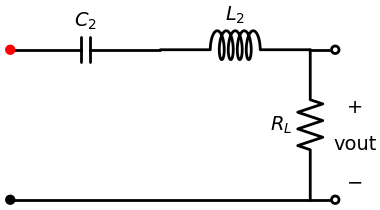

In [33]:
with schemdraw.Drawing() as d:
    d += Dot(color='red')
    d += (C2 := Capacitor( d='right', label=r'$C_2$'))
    d += (L2 := Inductor2( d='right', label=r'$L_2$'))
    d += (R := Resistor( d='down', label=r'$R_L$'))
    d += ( Line( xy=R.start, d='right', l=0.5))
    d += (dot := Dot(open=True,))
    d += ( Line(xy=R.end, d='right',l=0.5))
    d += ( Dot(open=True,))
    d += ( Line(xy=R.end, d='left', tox=C2.start))
    d += ( Dot())
    d += ( Gap( d='down', xy= dot.start, toy= R.end, label=['+','vout','−'],lblofst=0.4))

Het verloop van deze stroom als functie van de tijd is weergegeven in {numref}`efig2`. De gemiddelde waarde van deze stroom is 0 mA.

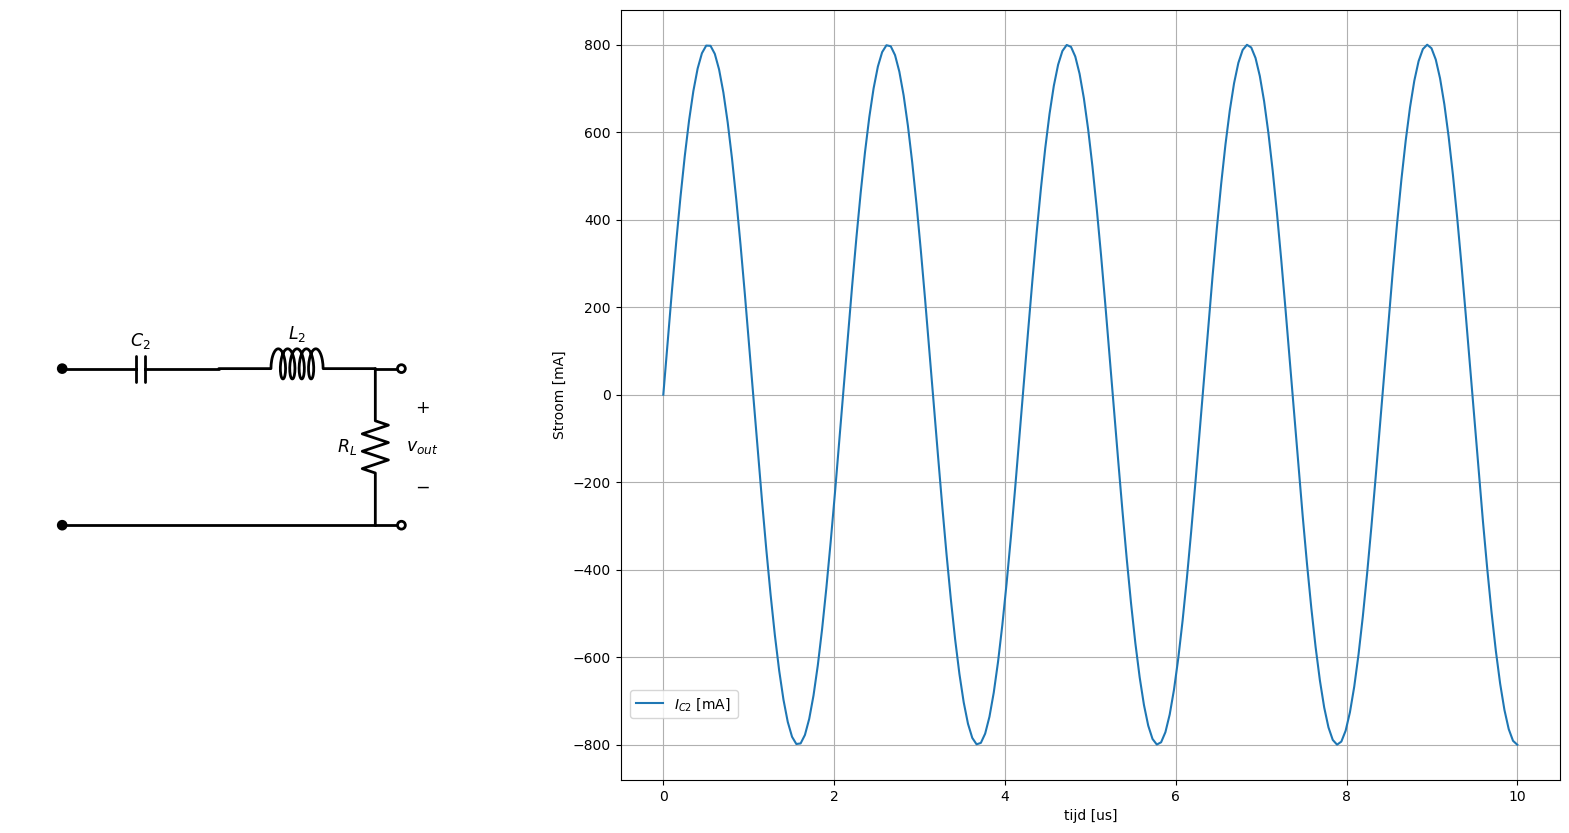

In [16]:
figure, ax = plt.subplots(1,2,figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2]})
d.draw(canvas=ax[0])
ax[0].set_xlim(-1,8)
ax[0].set_ylim(-5,4)
ax[0].set_aspect('equal')
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
iC2L2=800*np.sin(475000*np.pi*2*time)
ax[1].plot(time*1e6,iC2L2,label='IC2 [mA] ')
ax[1].legend( loc=(0.01,.08))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Stroom [mA]');

Vervolgens voegen we een spoel ($L_1$) toe tussen de voeding en de ingangsknoop van de seriekring (zie {numref}`efig3`).
Deze spoel zal zorgen voor een zo constant mogelijke stroom bovenop de sinusvormige stroom in {numref}`efig2`.

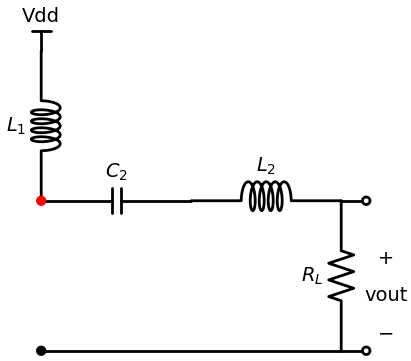

In [35]:
with schemdraw.Drawing() as d:
    d += ( Vdd( label='Vdd'))
    d += (L1 := Inductor2( d='down', label=r'$L_1$'))
    d +=  Dot(color='red')
    d += (C2 := Capacitor( d='right', label=r'$C_2$'))
    d += (L2 := Inductor2( d='right', label=r'$L_2$'))
    d += (R := Resistor( d='down', label=r'$R_L$'))
    d += ( Line( xy=R.start, d='right', l=0.5))
    d += ( dot := Dot(open=True,))
    d += ( Line(xy=R.end, d='right',l=0.5))
    d += ( Dot(open=True,))
    d += ( Line(xy=R.end, d='left', tox=C2.start))
    d += ( Dot())
    d += ( Gap( d='down', xy= dot.start, toy= R.end, label=['+','vout','−'],lblofst=0.4))

In {numref}`efig4` toont het verloop van de som van beide stromen die naar de rode knoop lopen. We zien dat we in dit geval een DC componente van 400 mA bovenop de sinuscomponente komt.

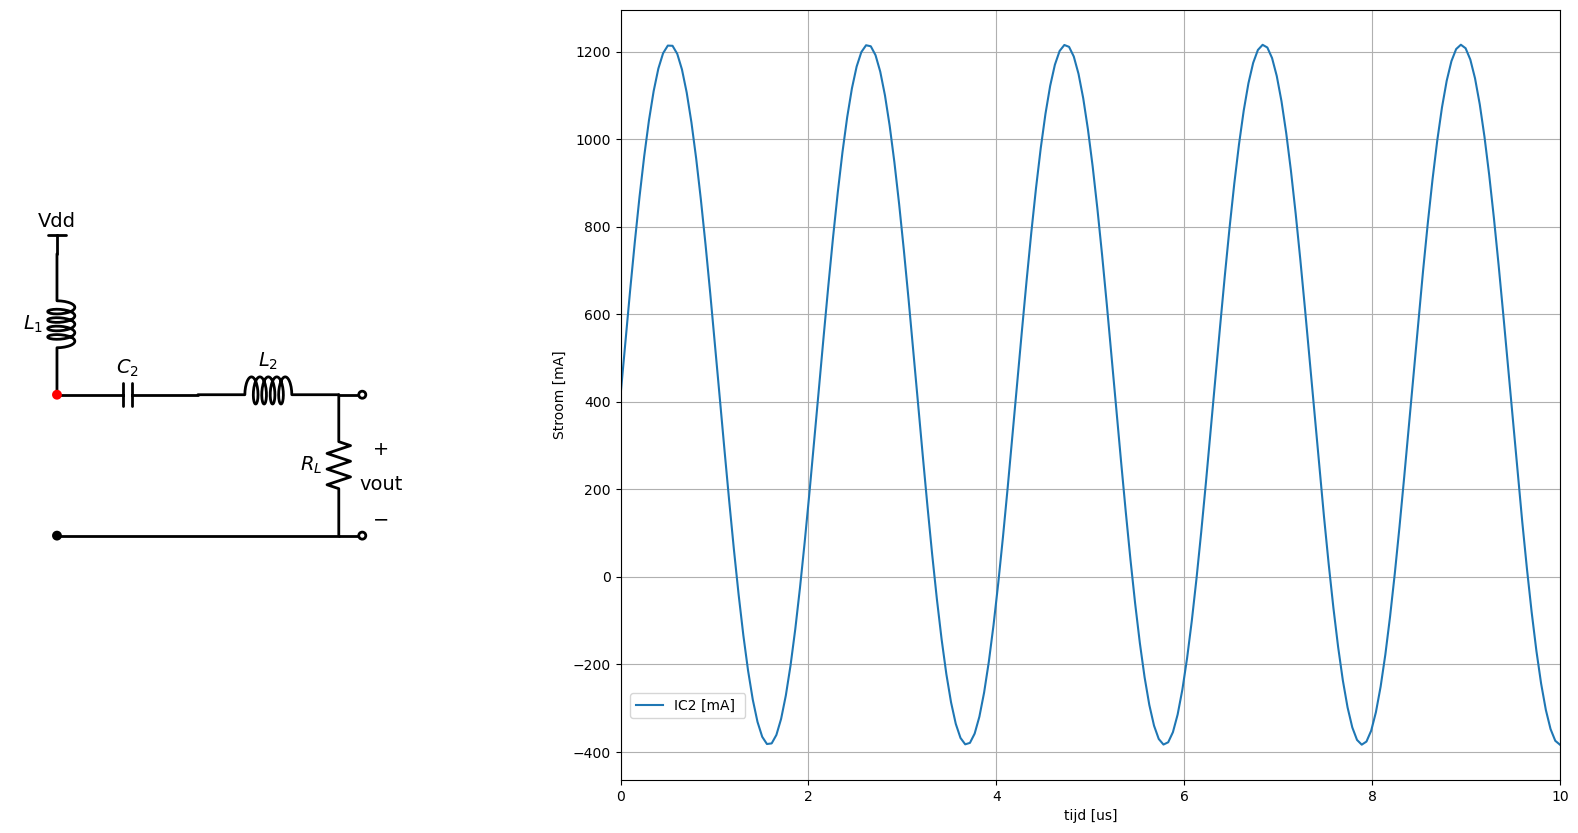

In [36]:
figure, ax = plt.subplots(1,2,figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2]})
d.draw(canvas=ax[0])
ax[0].set_xlim(-1,9)
ax[0].set_ylim(-8,2)
ax[0].set_aspect('equal')
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
iC2L2=800*np.sin(475000*np.pi*2*time)+416
ax[1].plot(time*1e6,iC2L2,label='IC2 [mA] ')
ax[1].legend( loc=(0.01,.08))
ax[1].grid()
ax[1].set_xlim(0,10)
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Stroom [mA]');

Natuurlijk moet op basis van de [stroomwet](https://en.wikipedia.org/wiki/Kirchhoff%27s_circuit_laws) van [Kirchhoff](https://en.wikipedia.org/wiki/Gustav_Kirchhoff) de netto stroom naar elke knoop 0 zijn.

\begin{equation}\label{eq:Kirchoff}
\sum_{j \neq i}^n I_{ij}=0.
\end{equation}

Wanneer dit niet zo zou zijn zou de spanning op deze knoop snel gaan stijgen of dalen tot dat wel het geval wordt. De snelheid waarmee dat gebeurt hangt af van de (parasitaire) capaciteit van de knoop.

In de plaats van te werken met een ongekende parasitaire capaciteit, kunnen we beter een goed gekozen condenstor $C_1$ plaatsen, zoals aangegeven in {numref}`efig6`. De nettostroom naar de rode knoop zal dan nu lopen naar deze condenstor waardoor aan de wetten van Kirchhoff voldaan is.

De spanning op de rode knoop is dan vervolgens bepaald door de lading op de condensator $C_1$.
Deze lading wordt bekomen door de integratie van de stroom op de condensator $C_1$:

$$v=\frac{1}{C_1}\int_0^t i(t) dt $$

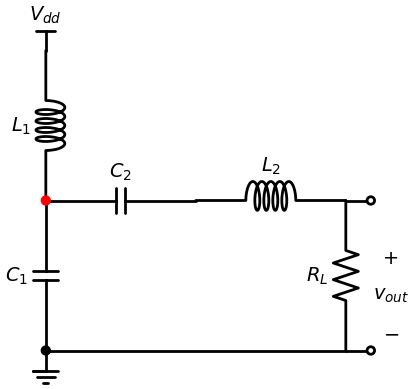

In [37]:
with schemdraw.Drawing() as d:
    d += ( Vdd( label='$V_{dd}$'))
    d += (L1 := Inductor2( d='down', label='$L_1$'))
    d += Dot(color='red')
    d += (C2 := Capacitor( d='right', label='$C_2$'))
    d += (L2 := Inductor2( d='right', label='$L_2$'))
    d += (R := Resistor( d='down', label='$R_L$'))
    d += ( Line( xy=R.start, d='right', l=0.5))
    d += (dot := Dot(open=True,))
    d += ( Line(xy=R.end, d='right',l=0.5))
    d += ( Dot(open=True,))
    d += ( Line(xy=R.end, d='left', tox=C2.start))
    d += ( Dot())
    d += ( Gap( d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4))
    d += (C1 := Capacitor( d='down',xy=L1.end,toy=R.end, label='$C_1$'))
    d += ( Ground())

In {numref}`efig6b` tonen we het verloop van de spanning op de rode knoop die we zouden bekomen door integratie van de stoom (die getoond werd in {numref}`efig4`) op een condensator van 4.7nF.

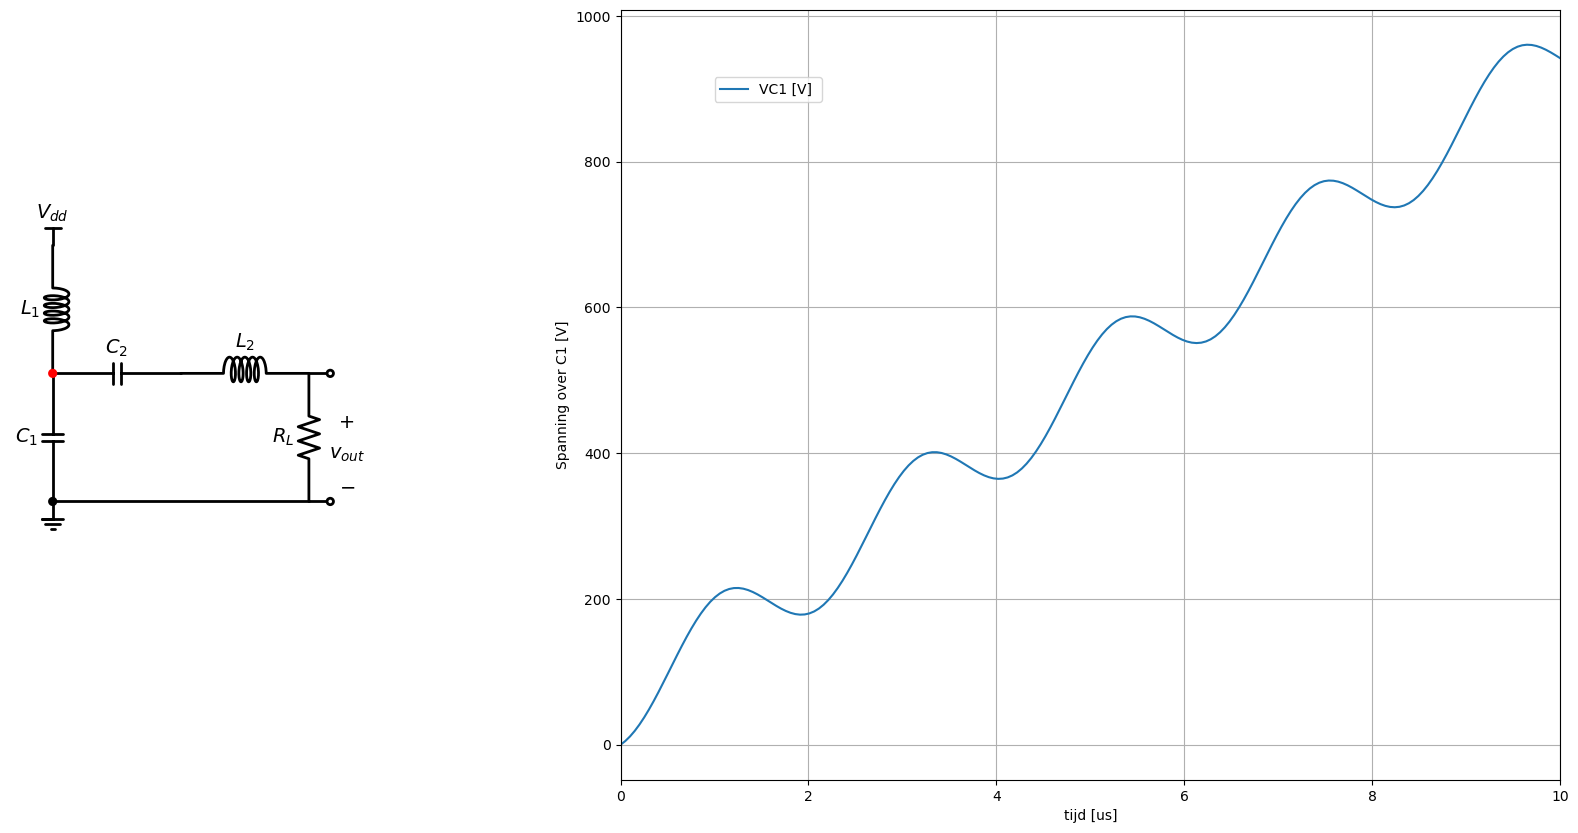

In [38]:
figure, ax = plt.subplots(1,2,figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2]})
d.draw(canvas=ax[0])
ax[0].set_xlim(-1,10)
ax[0].set_ylim(-9,2)
ax[0].set_aspect('equal')
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
vc1=1/4.7e-9*(-800*(np.cos(475000*np.pi*2*time)-1)/(475000*np.pi*2)+416*time)/1000
ax[1].plot(time*1e6,vc1,label='VC1 [V] ')
ax[1].legend( loc=(0.1,.88))
ax[1].grid()
ax[1].set_xlim(0,10)
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Spanning over C1 [V]');

In het schema van {numref}`efig6b` zien we dat de spanning over de condensator $C_1$ continu gaat blijven stijgen. Dit is natuurlijk niet gewenst omdat we dan geen periodiek signaal krijgen en omdat dat een veel te hoge voedingsspanning zou vereisen. We moeten er echter wel mee rekening houden dat de integratie op $C_1$ slechts begint vanaf het moment wanneer er stroom vloeit naar $C_1$.

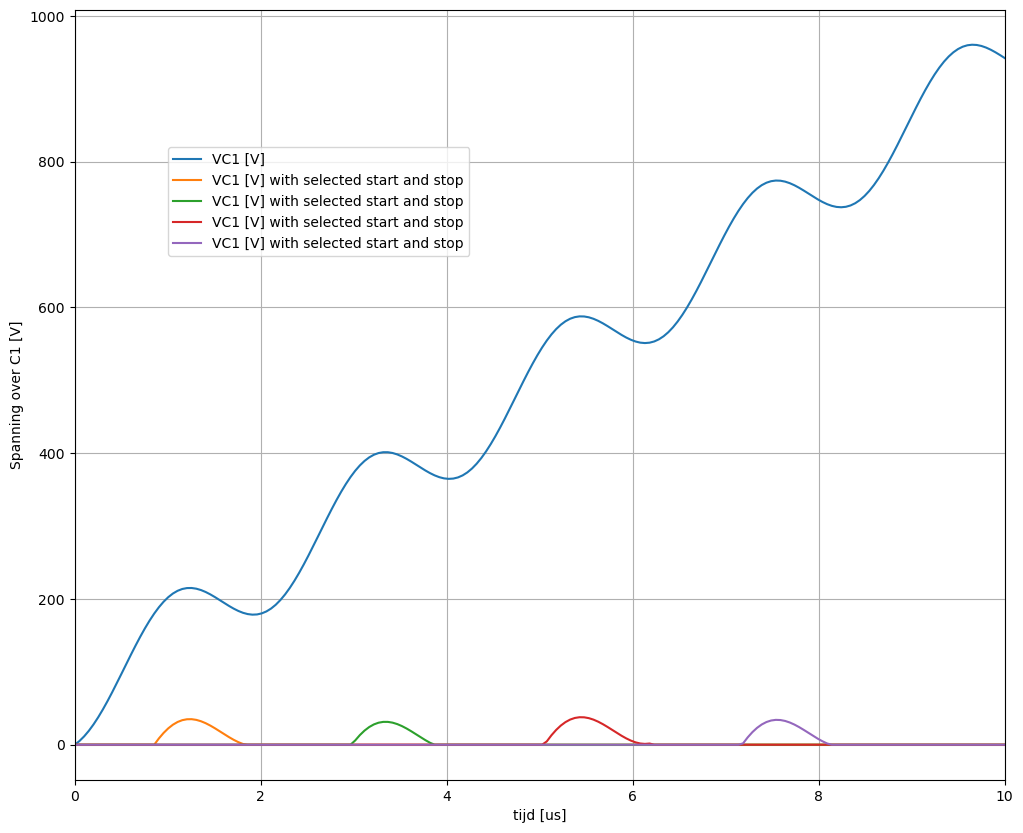

In [54]:
figure, ax = plt.subplots(1,1,figsize=(12, 10))

time=np.linspace(0,1e-5,200)
vc1=1/4.7e-9*(-800*(np.cos(475000*np.pi*2*time)-1)/(475000*np.pi*2)+416*time)/1000
vc2=[v-180 if (t<2e-6 and v>180) else 0 for v,t in zip(vc1,time)]
vc3=[v-370 if (t<4.1e-6 and v>370) else 0 for v,t in zip(vc1,time)]
vc4=[v-550 if (t<6.2e-6 and v>550) else 0 for v,t in zip(vc1,time)]
vc5=[v-740 if (t<8.3e-6 and v>740) else 0 for v,t in zip(vc1,time)]
ax.plot(time*1e6,vc1,label='VC1 [V] ')
ax.plot(time*1e6,vc2,label='VC1 [V] with selected start and stop')
ax.plot(time*1e6,vc3,label='VC1 [V] with selected start and stop')
ax.plot(time*1e6,vc4,label='VC1 [V] with selected start and stop')
ax.plot(time*1e6,vc5,label='VC1 [V] with selected start and stop')
ax.legend( loc=(0.1,.68))
ax.grid()
ax.set_xlim(0,10)
ax.set_xlabel('tijd [us]')
ax.set_ylabel('Spanning over C1 [V]');

We kunnen het startpunt van de integratie van de stroom bepalen door het moment te bepalen vanaf wanneer er stoom loopt naar de condensator $C_1$. Door deze startmomenten goed te kiezen, kunnen we telkens momenten kiezen dat de spanning later terug 0 wordt, wat dan het stopmoment wordt. Deze keuze van deze start en stopmomenten is aangegeven in {numref}`efig6c`.

In een volgende stap voegen we een transistor toe om de spanning over de condensator $C_1$ op  0V te houden gedurende een bepaalde tijd zodat we, als de oscillatie daarna verder loopt we op een gegeven moment in tijd kunnen terugkeren naar de huidige spanning. Dat geeft ons dan het schema zoals aangegeven in {numref}`efig7`.

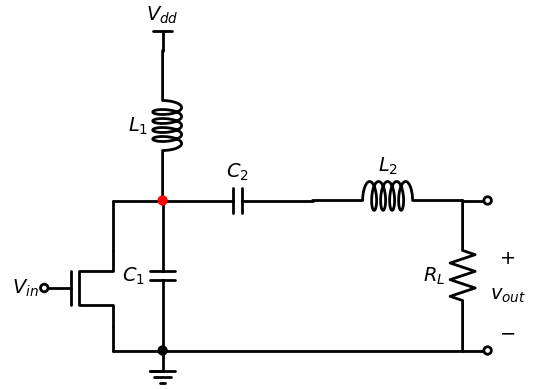

In [39]:
with schemdraw.Drawing() as d:
    d += ( Vdd( label=r'$V_{dd}$'))
    d += (L1 := Inductor2( d='down', label=r'$L_1$'))
    d += Dot(color='red')
    d += (C2 := Capacitor( d='right', label=r'$C_2$'))
    d += (L2 := Inductor2( d='right', label=r'$L_2$'))
    d += (R := Resistor( d='down', label=r'$R_L$'))
    d += ( Line( xy=R.start, d='right', l=0.5))
    d += (dot := Dot(open=True,))
    d += ( Line(xy=R.end, d='right',l=0.5))
    d += ( Dot(open=True,))
    d += ( Line(xy=R.end, d='left', tox=C2.start))
    d += ( Dot())
    d += ( Gap( d='down', xy= dot.start, toy= R.end, label=['+',r'$v_{out}$','−'],lblofst=0.4))
    d += (C1 := Capacitor( d='down',xy=L1.end,toy=R.end, label=r'$C_1$'))
    d += ( Ground())
    d += ( Line( d='left', l=1))
    d += ( Line( d='up', l=0.5))
    d += (T := NFet( d='left', lftlabel=r'$V_{in}$'))
    d += ( Line( d='up',toy=R.start))
    d += ( Line(tox=L1.end, d='right'))
    d += ( Dot(open=True, xy=T.gate))

Het resultaat van de simulatie met dit schema zien we in {numref}`efig9`.

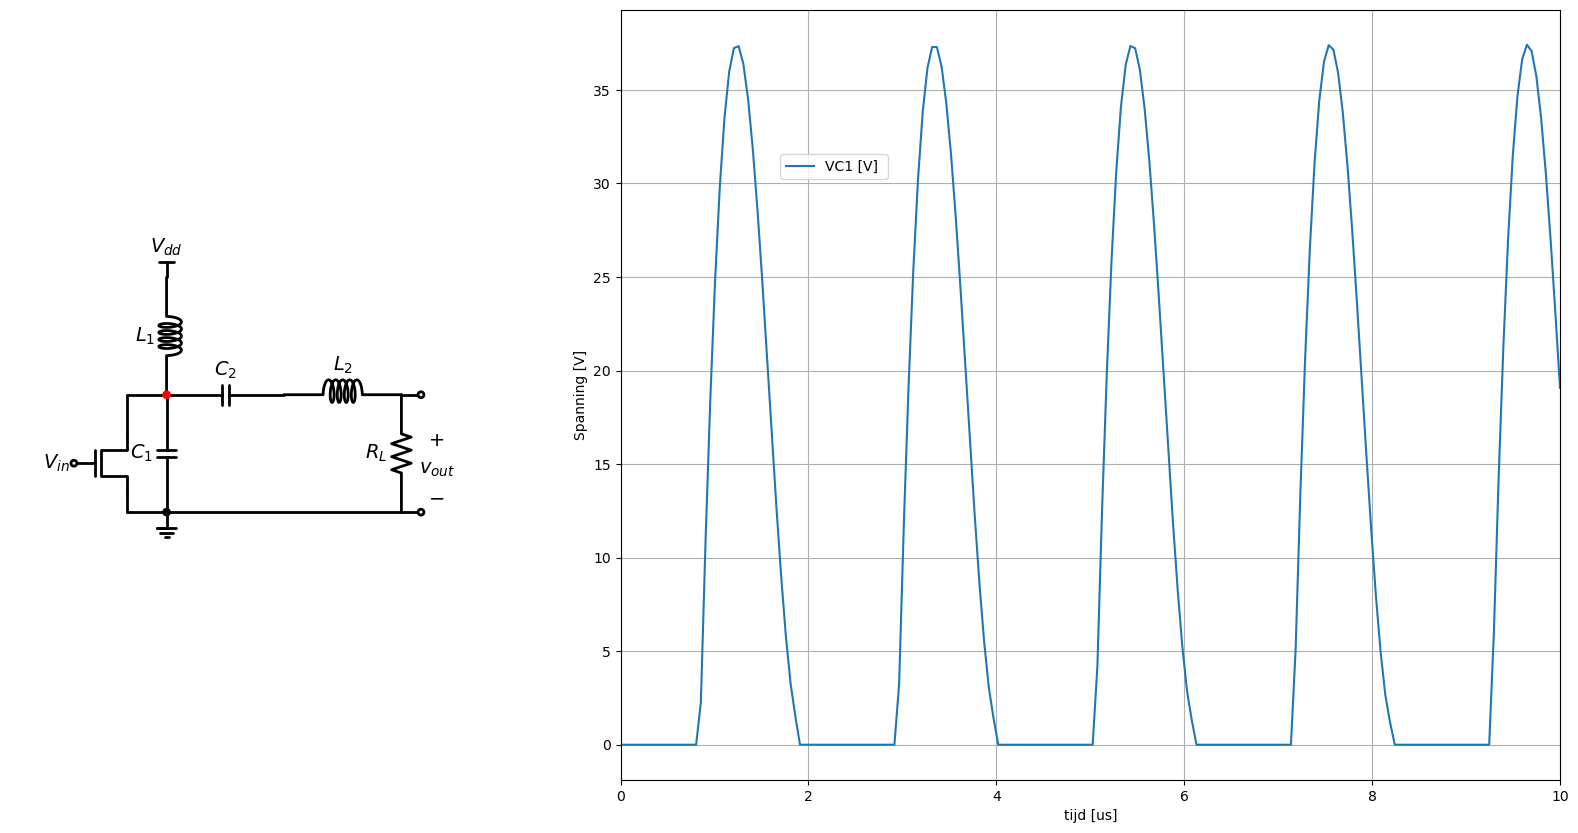

In [42]:
a=0.2
def vcf(time,a):
    halfperiod=int(time/1.05263e-6+a)
    if halfperiod%2==0:
        return 0
    else:
        vc1=1/4.7e-9*(-800*(np.cos(475000*np.pi*2*time)-1)/(475000*np.pi*2)+416*time)/1000
        time2=(halfperiod-a)*1.05263e-6
        vc2=1/4.7e-9*(-800*(np.cos(475000*np.pi*2*time2)-1)/(475000*np.pi*2)+416*time2)/1000
        return vc1-vc2

figure, ax = plt.subplots(1,2,figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2]})
d.draw(canvas=ax[0])
ax[0].set_xlim(-4,8)
ax[0].set_ylim(-9,3)
ax[0].set_aspect('equal')
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
iC2L2=200*np.sin(475000*np.pi*2*time)+416
ax[1].plot(time*1e6,[vcf(x,a) for x in time],label='VC1 [V] ')
ax[1].legend( loc=(0.17,.78))
ax[1].grid()
ax[1].set_xlim(0,10)
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Spanning [V]');

### Uitbreiding van het schema met een derde harmonische filter

In 2013 werd het originele design uitgebreid door ook de derde harmonische weg te filteren {cite}`medianoClassERFPower2013`. In dit schema (zie {numfig}`efig20`) voegen we een parallelkring voor de derde harmonische frequentie ($L_3 C_3$) toe aan de seriekring voor de eerste harmonische ($L_2 C_2$). Op deze manier combineren we de voordelen van klasse E en klasse F versterkers.

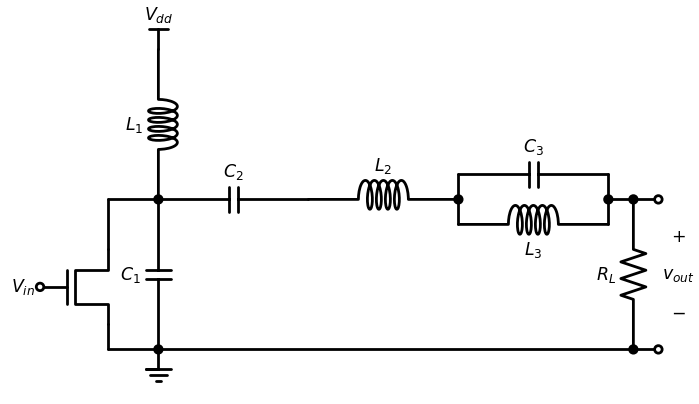

In [52]:
with schemdraw.Drawing() as d:
    d += ( Vdd( label='$V_{dd}$'))
    d += (L1 := Inductor2( d='down', label='$L_1$'))
    d += ( Dot())
    d += (C2 := Capacitor( d='right', label='$C_2$'))
    d += (L2 := Inductor2( d='right', label='$L_2$'))
    d += ( Dot())
    d += ( Line(xy=L2.end, d='up',l=0.5))
    d += (C3 := Capacitor( d='right', label='$C_3$'))
    d += ( Line( d='down',l=0.5))
    d += ( Dot())
    d += ( Line(xy=L2.end, d='down',l=0.5))
    d += (L3 := Inductor2( d='right', botlabel='$L_3$'))
    d += ( Line( d='up',l=0.5))
    d += ( Line( d='right',l=0.5))
    d += ( Dot())
    d += (R := Resistor( d='down', label='$R_L$'))
    d += ( Dot())
    d += ( Line( xy=R.start, d='right', l=0.5))
    d += ( dot := Dot(open=True,))
    d += ( Line(xy=R.end, d='right',l=0.5))
    d += ( Dot(open=True,))
    d += ( Line(xy=R.end, d='left', tox=C2.start))
    d += ( Dot())
    d += ( Gap( d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4))
    d += (C1 := Capacitor( d='down',xy=L1.end,toy=R.end, label='$C_1$'))
    d += ( Ground())
    d += ( Line( d='left', l=1))
    d += ( Line( d='up', l=0.5))
    d += (T := NFet( d='left', lftlabel='$V_{in}$'))
    d += ( Line( d='up',toy=R.start))
    d += ( Line(tox=L1.end, d='right'))
    d += ( Dot(open=True, xy=T.gate))

## Uitgewerkte voorbeelden

Hieronder lichten we de praktische uitwerking van de klasse E versterker toe aan de hand van 3 uitgewerkte voorbeelden:

* Een 5W versterker bij 475 kHz
* Een 50W versterker bij 137.77 kHz
* Een 1W on chip versterker bij 2 GHz voor GSM toepassingen

### Ontwerpvergelijkingen voor laagfrequent Klasse E Versterkers

Voor het ontwerpen van een aantal voorbeelden kunnen we de ontwerpvergelijkingen gebruiken vanuit {cite}`nathanosokalClassERFPower2001`. Deze ontwerpvergelijkingen zijn uitgewerkt voor lagere frequenties. Voor MHz frequenties (en hoger) moet er in detail geanalyseerd en gesimuleerd worden. De onderstaande vergelijkingen (Eq.{eq}`Deq1` tot Eq.{eq}`Deq4`) kunnen daarvoor niet gebruikt worden.

Voor frequenties beneden 1 MHz: 

$$R_L= 0.5768 \frac{(V_{DD}-V_{sat})^2}{P} \left(1.00001-\frac{0.4144}{Q}-\frac{0.5775}{Q^2}+\frac{0.206}{Q^3}   \right) $$ (Deq1)

$$C_1= \frac{1 }{5.4466 \omega R_L} \left(0.99866+\frac{0.91424}{Q}-\frac{1.03175}{Q^2}\right)+\frac{0.6}{\omega^2 L_1} $$  (Deq2)

$$C_2= \frac{1 }{\omega R_L} \left( \frac{1 }{Q-0.104823} \right)\left(1.00121+\frac{1.01468 }{Q-1.7879} \right)-\frac{0.2}{\omega^2 L_1} $$  (Deq3)

$$L_2=\frac{Q R_L}{\omega} $$  (Deq4)

met $\omega=2 \pi f$, $f$ de frequentie, $P$ het gewenste vermogen, $V_{sat}$ de saturatiespanning van de transistor en $Q$ de vereiste kwaliteitsfactor van de kring. De namen van de componenten komen overeen met het schema {numfig}`efig7`.
De bovenstaande vergelijkingen (Eq.{eq}`Deq1` tot Eq.{eq}`Deq4`) laten ons dus toe om het schema op te stellen op basis van $P$, $V_{DD}$, $f$ en $Q$. Enkel $L_1$ kan hierbij vrij gekozen worden. Dit moet wel gedaan worden op een zodanige wijze dat realistische waardes voor alle andere componenten bekomen worden.
In veel praktische gevallen zal de impedantie van de belasting ($R_L$) al vast liggen, bijvoorbeeld wanneer een specifieke antenne moet gebruikt worden. In dat geval moeten we de vergelijking Eq.{eq}`Deq1` omkeren en de voedingsspanning ($V_{DD}$) met $R_L$ als gegeven.
Ook komt vaak voor dat de kwaliteitsfactor $Q$ niet gegeven is. In dit geval is het theoretisch te verkiezen om $Q$ zo hoog mogelijk te kiezen, we zien onmiddellijk uit Eq.{eq}`Deq4` dat dat dan een te hoge waarde voor $L_2$ zou geven.

### Voorbeeld 1: 5W versterker bij 475 kHz

We ontwerpen een klasse E versterker die een vermogen van 5W moet kunnen leveren bij een frequentie van 475 kHz, bij een voedingsspanning van 12.5V, met een Q factor van 5 en een saturatiespanning van de bipolaire transistor van 0.5 V. Wanneer we de vergelijkingen Eq.{eq}`Deq1` tot Eq.{eq}`Deq4` gebruiken om de elementen van dit circuit uit te rekenen bekomen we de volgende waardes voor de verschillende componenten:

* **Verwacht vermogen** : 5W
* **Frequentie** : 475 kHz
* **Voedingsspanning** : 12.5 V
* **Kwaliteitsfactor** : 5
* **Saturatiespanning** 0.5V

In [25]:
def ClassECalc(Q=5, Vcc=12.5, Vo=0.5, f=475000,L1=0.001, P=5, verbose=False, plot=True,TransformerCoax=False):
    
    R=0.576801*((Vcc-Vo)*(Vcc-Vo)/P)*(1.0000086-(0.414396/Q)-(0.577501/(Q*Q))+(0.205967/(Q*Q*Q)));
    C1=(1/(34.2219*f*R))*(0.99866+(0.91424/Q)-(1.03175/(Q*Q)))+0.6/((2*np.pi*f)*(2*np.pi*f)*L1);
    XC1=-1/(2*np.pi*f*C1);
    C2=(1/(2*np.pi*f*R))*(1/(Q-0.104823))*(1.00121+1.01468/(Q-1.7879))-0.2/(2*np.pi*f*2*np.pi*f*L1);
    XC2=-1/(2*np.pi*f*C2);
    L2=Q*R/(2*np.pi*f);
    XL2=2*np.pi*f*L2;
    Icc = P/(Vcc-Vo);
    Vds = Vcc*3.56/0.8;
    tr = np.sqrt(50.0/R)
    DX=XL2+XC2
    if verbose:
        print("R{} = {:.2f} Ohm".format('L', R))
        print("C\u2081 = {:.2f} nF (i.e. complexe impedantie van {:.2f} i Ohm)".format(C1*1000000000, XC1))
        print("C\u2082 = {:.2f} nF (i.e. complexe impedantie van {:.2f} i Ohm)".format( C2*1000000000, XC2))
        print("L\u2082 = {:.2f} uH (i.e. complexe impedantie van {:.2f} i Ohm)".format( L2*1000000, XL2))
        print("Totale complexe impedantie (seriekring):  {:.2f} i Ohm".format(DX))
        print("Maximale stroom uit de voeding: {:.2f} mA".format(Icc*1000))
        print("Maximale source-drain spanning (transistor): {:.2f} V".format(Vds))
        print("Hierbij werd een 80% veiligheidsmarge genomen")
        print("We kunnen de uitgang omwerken naar een impedantie van 50 Ohm")
        print("door een transformator met wikkelverhouding: {:.2f} ".format(tr))
    if plot:
        with schemdraw.Drawing() as d:
            d += ( Vdd( label='$V_{dd}$'))
            d += (eL1 := Inductor2( d='down', label="{:.2f} uH".format(L1*1000000)))
            d += ( Dot())
            d += (eC2 := Capacitor( d='right', label="{:.2f} nF".format(C2*1000000000)))
            d += (eL2 := Inductor2( d='right', label="{:.2f} uH".format(L2*1000000)))
            if TransformerCoax:
                d += (trans := Transformer( d='right',anchor='p1', label="{:.2f}".format(tr)))
                d += ( Line( xy=trans.s1, d='right', l=1))
                d += (coax := Coax(label="50 Ohm"))
                d += ( Line( xy=coax.end, d='right', l=0.5))
                d += (updot := Dot(open=True,))
                d += ( Line(xy=coax.shieldend, d='down',toy=trans.s2))
                d += ( Line( d='right',tox=updot.start))
                d += (downdot := Dot(open=True,))
                d += ( Gap( d='down',xy=updot.start, toy= downdot.start, label=['+','$v_{out}$','$-$']))
                d += ( Line(xy=coax.shieldstart, d='down',toy=trans.s2))
                d += ( Line( d='left',tox=trans.s2))
                d += ( Line( d='left',xy=trans.p2, tox=eC2.start))
            else:
                d += (eR := Resistor( d='down', label="{:.2f} Ohm".format(R)))
                d += ( Line( xy=eR.start, d='right', l=0.5))
                d += ( Dot(open=True,))
                d += ( Gap( d='down', toy= eR.end, label=['+','$v_{out}$','$-$'],lblofst=0.4))
                d += ( Line(xy=eR.end, d='right',l=0.5))
                d += ( Dot(open=True,))
                d += ( Line( d='left', tox=eC2.start))
                d += ( Dot())
            d += (eC1 := Capacitor( d='up',toy=eL1.end).label(label="{:.2f} nF".format(C1*1000000000),loc='bottom'))
            d += ( Ground(xy=eC1.start))
            d += ( Line( d='left', l=1))
            d += (eT := NFet( d='left', lftlabel='$V_{in}$'))
            d += ( Line( d='up',toy=eL1.end))
            d += ( Line(tox=eL1.end, d='right'))
            d += ( Dot(open=True, xy=eT.gate))
    return

ClassECalc(verbose=True,plot=False)

RL = 14.88 Ohm
C₁ = 4.78 nF (i.e. complexe impedantie van -70.07 i Ohm)
C₂ = 6.04 nF (i.e. complexe impedantie van -55.50 i Ohm)
L₂ = 24.93 uH (i.e. complexe impedantie van 74.39 i Ohm)
Totale complexe impedantie (seriekring):  18.89 i Ohm
Maximale stroom uit de voeding: 416.67 mA
Maximale source-drain spanning (transistor): 55.62 V
Hierbij werd een 80% veiligheidsmarge genomen
We kunnen de uitgang omwerken naar een impedantie van 50 Ohm
door een transformator met wikkelverhouding: 1.83 


Het bekomen schema met de waardes van alle componenten aangegeven vinden we terug in {numref}`efig10`.

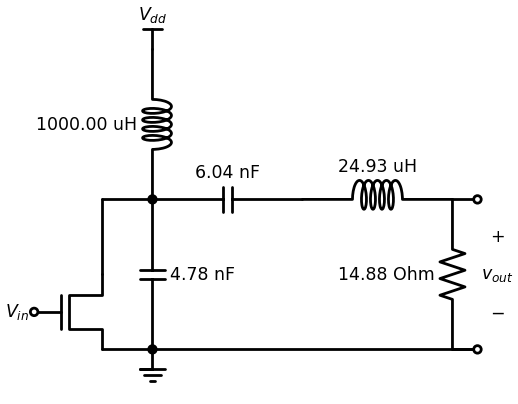

In [46]:
ClassECalc()

De overeenkomende spice file vinden we onder {numref}`eSpice1` en het resulaat van het opstarten van de versterken kunnen we terugvinden onder {numref}`efig11`.

```{literalinclude} ./simul/classE2.sp
:language: spice
:name: eSpice1
:caption: Klasse E spice file
```

In [3]:
display.Code(filename="simul/classE2.sp", language='spice') 

* Class E amp 1
M_M1         2 1 0 0 FDB33N25 
L_L1         2 3  1000uH  
C_C1         2 0  4.78nF  
L_L2         4 5  24.93uH  
C_C2         2 4  6.04nF  
R_RL         5 0  14.88 
V_Vdd        3 0 12.5V
V_Vin        1 0 PULSE(0 9 1.05u 20n 20n 1.05u 2.10526u) DC=0
.model FDB33N25 VDMOS(Rg=3 Rd=40m Rs=27m Vto=5.35 Kp=35 lambda=.05 Cgdmax=1.1n Cgdmin=25p Cgs=1.7n Cjo=800p Is=7.94p Rb=7m mfg=Fairchild Vds=250 Ron=94m Qg=37n)

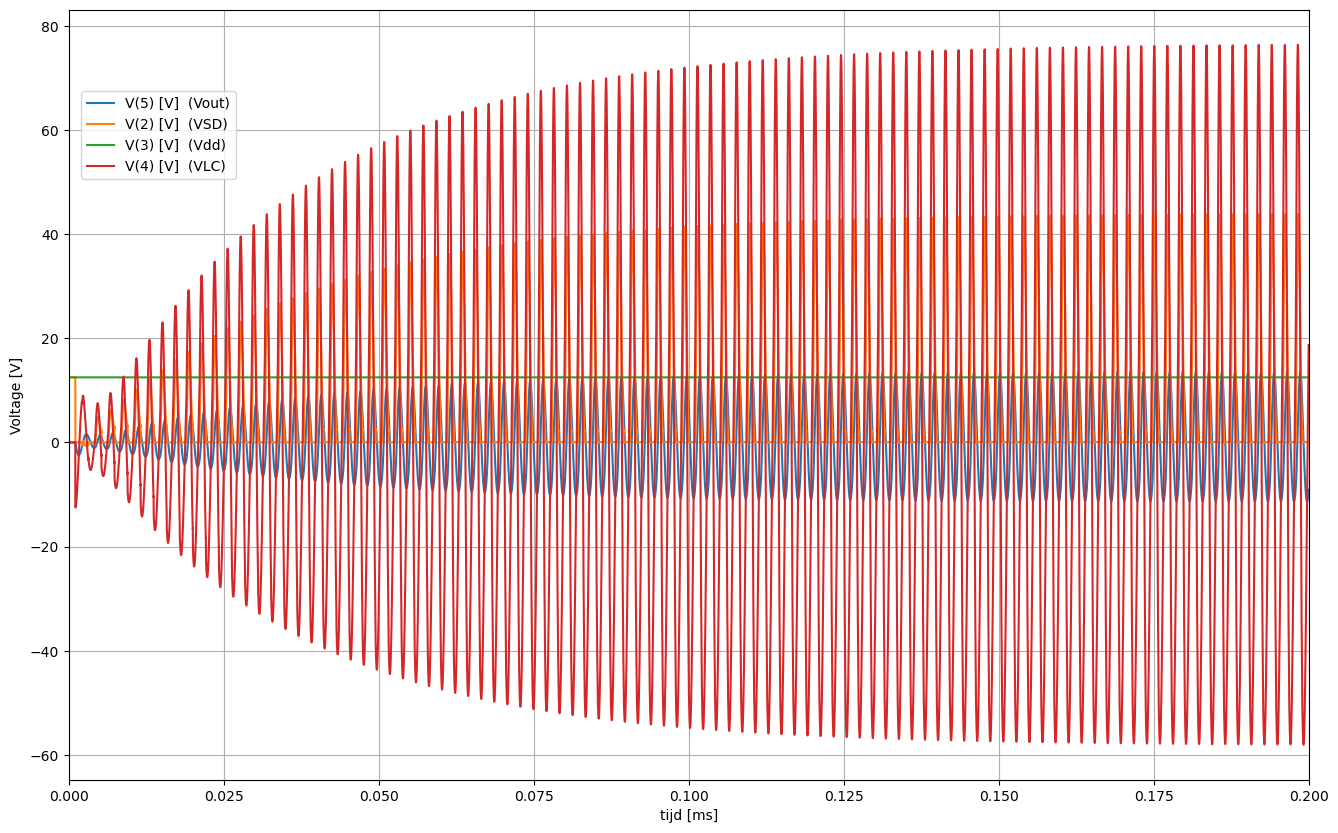

In [5]:
circuit=SpiceParser(path='simul/classE2.sp').build_circuit()  
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
simulator.save_currents="I1(M_M1)"
analysis = simulator.transient(step_time=3e-9, end_time=end_time)

figure, ax = plt.subplots(figsize=(16, 10))
ax.plot(analysis.time*1e3,analysis.nodes['5'],label='V(5) [V]  (Vout)')
ax.plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  (VSD)' )
ax.plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  (Vdd)' )
ax.plot(analysis.time*1e3,analysis.nodes['4'],label='V(4) [V]  (VLC)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [ms]')
ax.set_xlim(0,end_time*1e3)
ax.set_ylabel('Voltage [V]')
plt.show()

Het is interessant van de opstartsequentie in detail te bekijken. We zien in {numref}`efig12` dat zeker in het begin van de opstart de spanning over de transistor $V_{SD}$, dit is de spanning op knoop 2, niet helemaal naar 0 terugkeert voor de stoom begint te lopen. Dit geeft al aan dat, ondanks de poging om dit ontwerp perfect te krijgen, er zeker nog ruimte is voor verbetering.
we merken ook dat de spanning over de elementen van de trilkring veel hogere waardes bekomen dan de spanning aan de uitgang. Hiervoor vergelijk je best de spanning op knoop 4 met de spanning op knoop 5. 

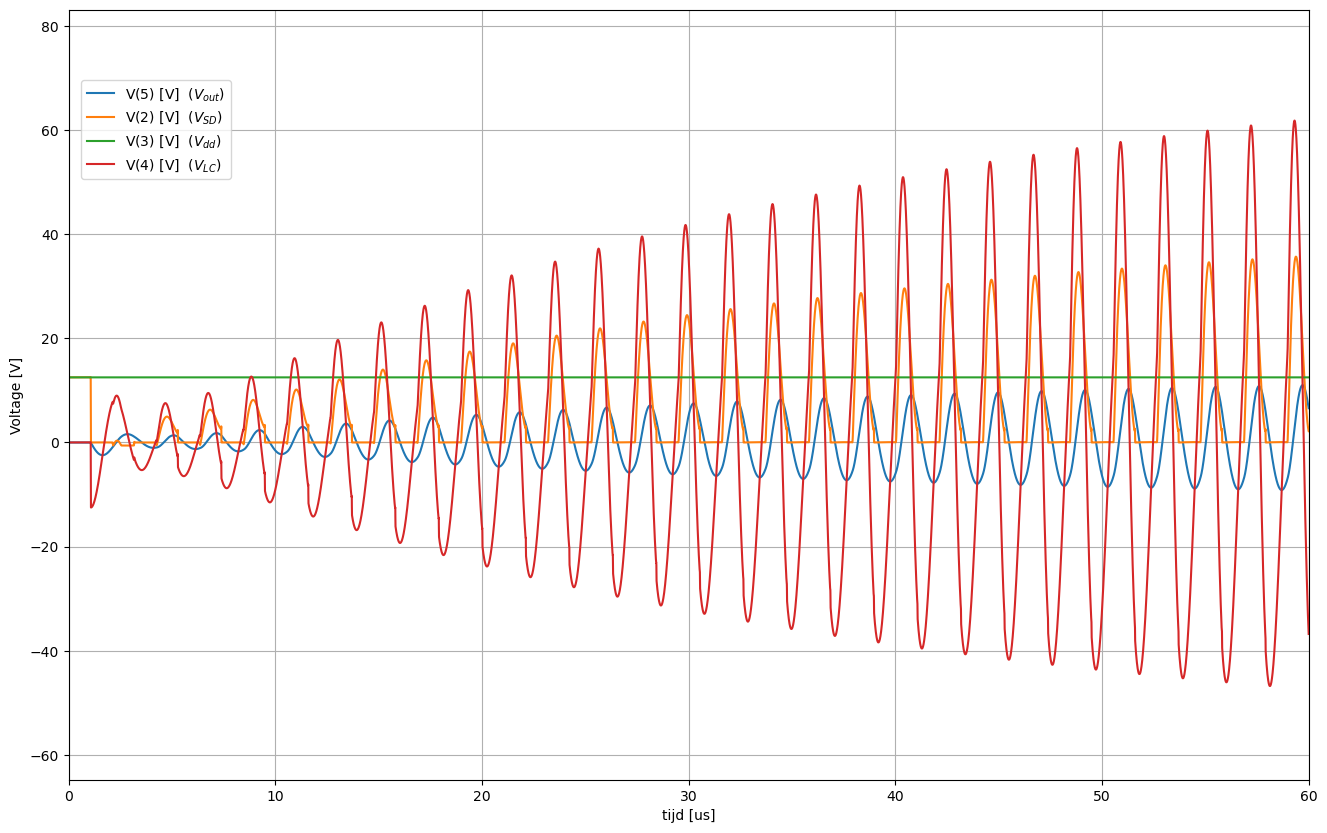

In [6]:
figure, ax = plt.subplots(figsize=(16, 10))
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['4'],label='V(4) [V]  ($V_{LC}$)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*3e5)
ax.set_ylabel('Voltage [V]')
plt.show()

De {numref}`efig12` toont enkel de spanningen. Om een goed zicht op de efficientie te bekomen moeten we zowel naar de spanning over de transistor als de stroom door de transistor kijken. Aan de linkerkant op {numref}`efig13` zijn beide zichtbaar. We verwachten dat we nooit gelijktijdig stroom door en spanning over de transistor hebben. We zien dat dat toch heel kort het geval is.

Het product van de stroom door en spanning over de transistor levert ons het momentaan vermogenverbruik (en dus de opwarming) van de transistor. Dit vinden we in de blauwe lijn ($P(M1)$) rechtsboven op {numref}`efig13` terug. We moeten dit vergelijken met het totale vermogen dat door de voeding ($P(V_{DD})$) geleverd (orange lijn) wordt. Geintegreerd over de tijd, zien we dat het energieverbruik in de transistor veel lager is dan het totale energieverbruik.
Rechtsonder op {numref}`efig13` tonen we de stroom door de transistor ten opzichte van de spanning over de transistor. Het verloop blijft kort bij de assen van de grafiek, waardoor het vermogenverlies beperkt blijft.
Op diezelfde figuur kan je ook het verloop van de stroom door de voeding ten opzichte van de voedingsgspanning zien (orange puntje). Aangezien beiden nauwelijks veranderen is dit verloop bijna niet zichtbaar.

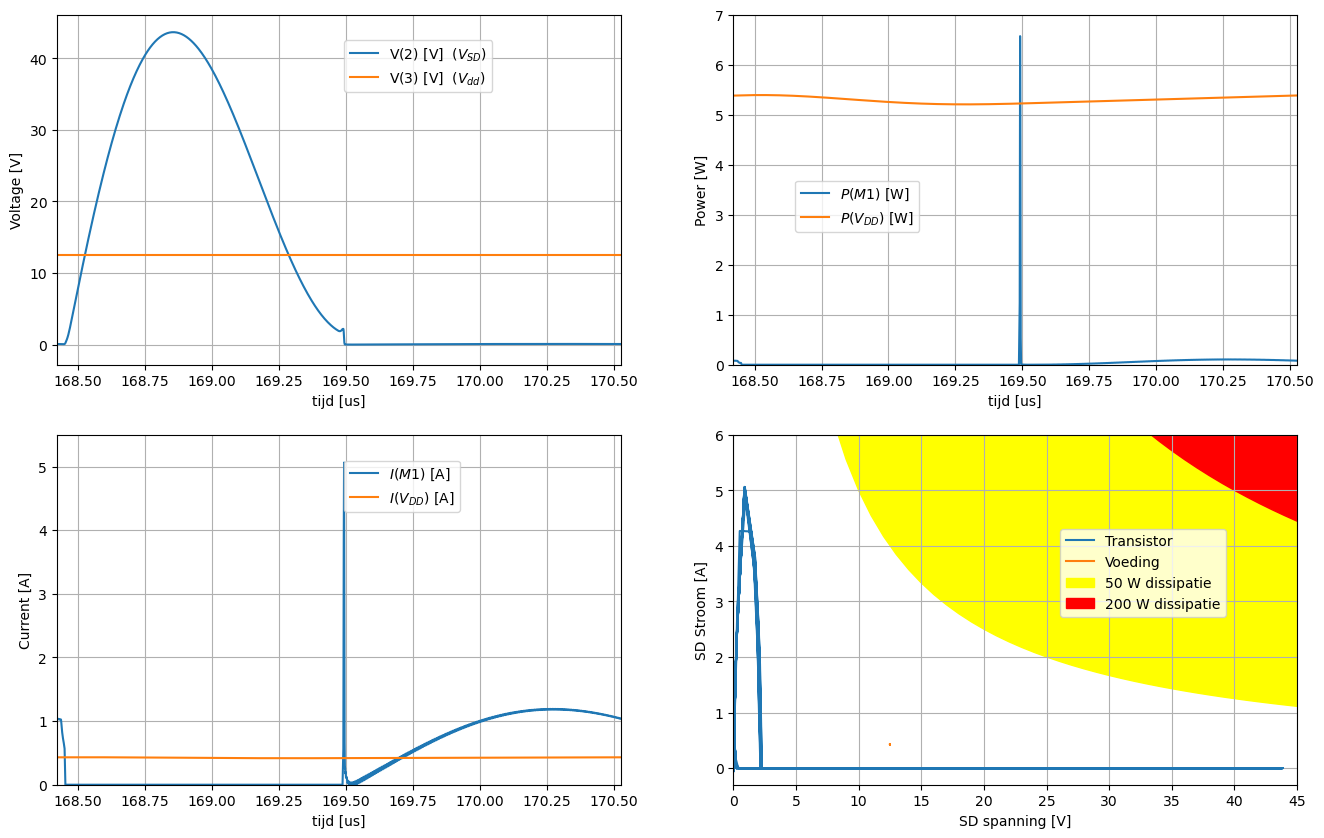

In [9]:
figure, ax = plt.subplots(2,2,figsize=(16, 10))
ax[0,0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax[0,0].plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax[0,0].legend( loc=(0.51,.78))
ax[0,0].grid()
ax[0,0].set_xlabel('tijd [us]')
ax[0,0].set_xlim(80*2.10526,81*2.10526)
ax[0,0].set_ylabel('Voltage [V]')
ax[1,0].plot(analysis.time*1e6,analysis.internal_parameters['@m_m1[id]'],label='$I(M1)$ [A]' )
ax[1,0].plot(analysis.time*1e6,-analysis.branches['v_vdd'],label='$I(V_{DD})$ [A]' )
#ax[1,0].plot(analysis.time*1e6,-analysis.branches['l_l2'],label='$I(L_{2})$ [A]' )
ax[1,0].legend( loc=(0.51,.78))
ax[1,0].grid()
ax[1,0].set_xlabel('tijd [us]')
ax[1,0].set_xlim(80*2.10526,81*2.10526)
ax[1,0].set_ylim(0,5.5)
ax[1,0].set_ylabel('Current [A]');
ax[0,1].plot(analysis.time*1e6,analysis.internal_parameters['@m_m1[id]']*analysis.nodes['2'],label='$P(M1)$ [W]' )
ax[0,1].plot(analysis.time*1e6,-analysis.branches['v_vdd']*analysis.nodes['3'],label='$P(V_{DD})$ [W]' )
#ax[0,1].plot(analysis.time*1e6,analysis.branches['l_l2']*analysis.nodes['5'],label='$P_{out}$ [W]' )
ax[0,1].legend( loc=(0.11,.38))
ax[0,1].grid()
ax[0,1].set_xlabel('tijd [us]')
ax[0,1].set_xlim(80*2.10526,81*2.10526)
ax[0,1].set_ylim(0,7)
ax[0,1].set_ylabel('Power [W]');
ax[1,1].plot(analysis.nodes['2'][60000:],analysis.internal_parameters['@m_m1[id]'][60000:],label='Transistor' )
ax[1,1].plot(analysis.nodes['3'][60000:],-analysis.branches['v_vdd'][60000:],label='Voeding' )
vref=np.arange(1,50,1)
ax[1,1].fill_between(vref,50/vref,200/vref,label='50 W dissipatie',color='yellow')
ax[1,1].fill_between(vref,200/vref,15+0*vref,label='200 W dissipatie',color='red')
ax[1,1].grid()
ax[1,1].legend( loc=(0.58,.48))
ax[1,1].set_xlabel('SD spanning [V]')
ax[1,1].set_xlim(0,45)
ax[1,1].set_ylim(-0.3,6)
ax[1,1].set_ylabel('SD Stroom [A]');

In een aantal toepassingen is zowel de voedingsspanning als de impedantie van de belasting een gegeven. Het kan bijvoorbeeld zijn dat het circuit moet werken op een gegeven batterijspanning en dat de impedantie van de belasting vast ligt, bijvoorbeeld een gegeven antenne of een coax kabel. In dat geval zullen we vertrekken vanuit de gegeven voedingsspanning en Eq.{eq}`Deq1` gebruiken om de verwachte impedantie uit te rekenen. Tenslotte passen we dan de verwachte impedantie aan tot de gewenste impedantie aan de hand van een transformator met de juiste wikkelverhouding.
We kunnen het vorig ontwerp aan de hand van een transformator met wikkelverhouding 1.83 ook aanpassen aan een coax lijn van 50 Ohm (zie {numref}`efig14`).

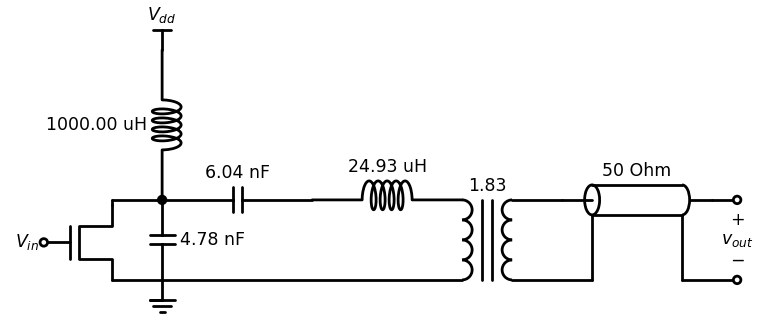

In [47]:
ClassECalc(TransformerCoax=True)

### Voorbeeld 2: 50W versterker bij 137.77 kHz

Dit is een voorbeeld afkomstig van een driver voor [amateur korte-golf zender](https://people.physics.anu.edu.au/~dxt103/class-e/).
We wensen een klasse E versterker die een vermogen van 50W moet kunnen leveren bij een frequentie van 137.77 kHz, bij een voedingsspanning van 12.5V, met een Q factor van 5 en een saturatiespanning van de bipolaire transistor van 0.9 V. Wanneer we de vergelijkingen Eq.{eq}`Deq1` tot Eq.{eq}`Deq4` gebruiken om de elementen van dit circuit uit te rekenen bekomen we de volgende waardes voor de verschillende componenten:


* **Verwacht vermogen** : 50W
* **Frequentie** : 137.77 kHz
* **Voedingsspanning** : 12.5 V
* **Kwaliteitsfactor** : 5
* **Saturatiespanning** 0.9V

```{margin} Opgave Voorbeeld 2
* **Verwacht vermogen** : 50W
* **Frequentie** : 137.77 kHz
* **Voedingsspanning** : 12.5 V
* **Kwaliteitsfactor** : 5
* **Saturatiespanning** 0.9V
```

In [26]:
ClassECalc(Q=5, Vcc=12.5, Vo=0.9, f=137777,L1=0.00027, P=50,verbose=True,plot=False)

RL = 1.39 Ohm
C₁ = 176.90 nF (i.e. complexe impedantie van -6.53 i Ohm)
C₂ = 222.56 nF (i.e. complexe impedantie van -5.19 i Ohm)
L₂ = 8.03 uH (i.e. complexe impedantie van 6.95 i Ohm)
Totale complexe impedantie (seriekring):  1.76 i Ohm
Maximale stroom uit de voeding: 4310.34 mA
Maximale source-drain spanning (transistor): 55.62 V
Hierbij werd een 80% veiligheidsmarge genomen
We kunnen de uitgang omwerken naar een impedantie van 50 Ohm
door een transformator met wikkelverhouding: 6.00 


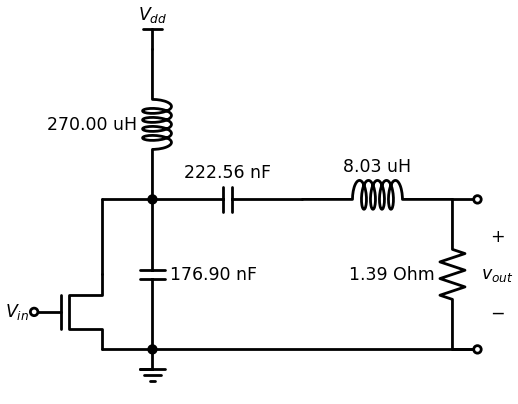

In [48]:
ClassECalc(Q=5, Vcc=12.5, Vo=0.9, f=137777,L1=0.00027, P=50)

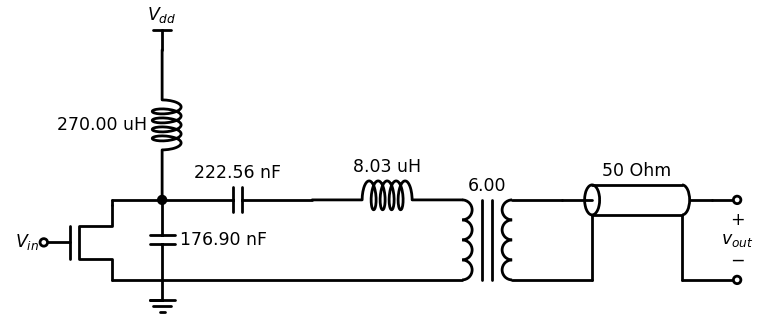

In [49]:
ClassECalc(Q=5, Vcc=12.5, Vo=0.9, f=137777,L1=0.00027, P=50,TransformerCoax=True)

```{literalinclude} ./simul/classE.sp
:language: spice
:name: eSpice2
:caption: Klasse E spice file
```

In [4]:
display.Code(filename="simul/classE.sp", language='spice') 

* Class E amp 1
M_M1         2 1 0 0 FDB33N25 
L_L1         2 3  270uH  
C_C1         2 0  176.9nF  
L_L2         4 5  8.03uH  
C_C2         2 4  222.56nF  
R_RL         5 0  1.39 
V_Vdd        3 0 12.5V
V_Vin        1 0 PULSE(0 9 3.65u 20n 20n 3.65u 7.3u) DC=0
.model FDB33N25 VDMOS(Rg=3 Rd=40m Rs=27m Vto=5.35 Kp=35 lambda=.05 Cgdmax=1.1n Cgdmin=25p Cgs=1.7n Cjo=800p Is=7.94p Rb=7m mfg=Fairchild Vds=250 Ron=94m Qg=37n)

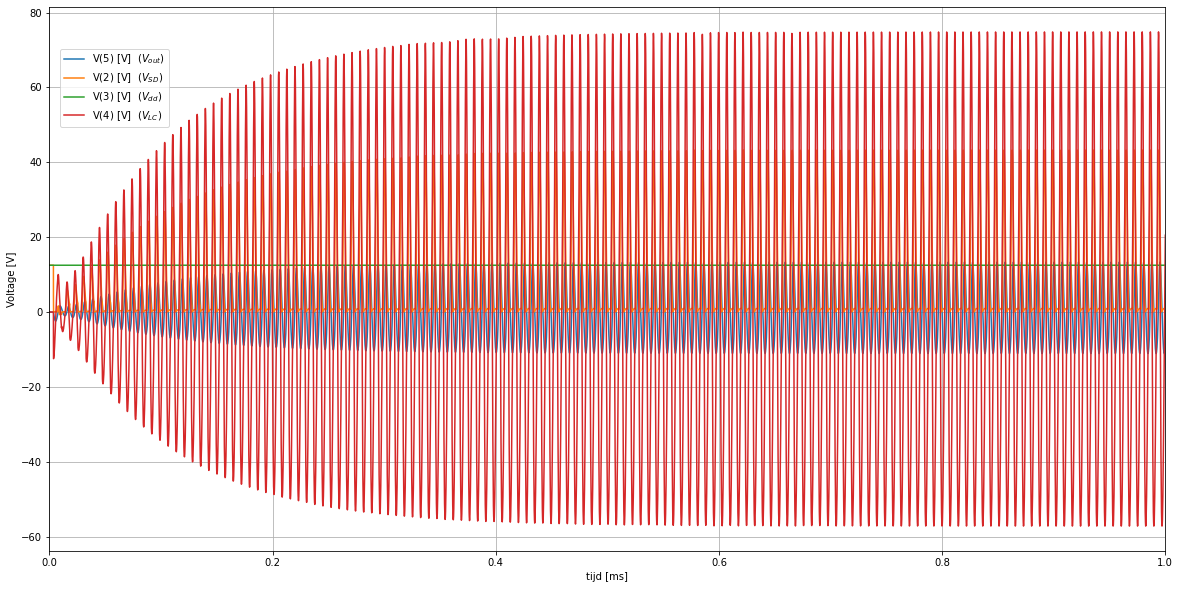

In [2]:
circuit=SpiceParser(path='simul/classE.sp').build_circuit()  
end_time=1e-3
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
simulator.save_currents="I1(M_M1)"
analysis = simulator.transient(step_time=2e-7, end_time=end_time)

figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis.time*1e3,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['4'],label='V(4) [V]  ($V_{LC}$)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [ms]')
ax.set_xlim(0,end_time*1e3)
ax.set_ylabel('Voltage [V]')
plt.show()

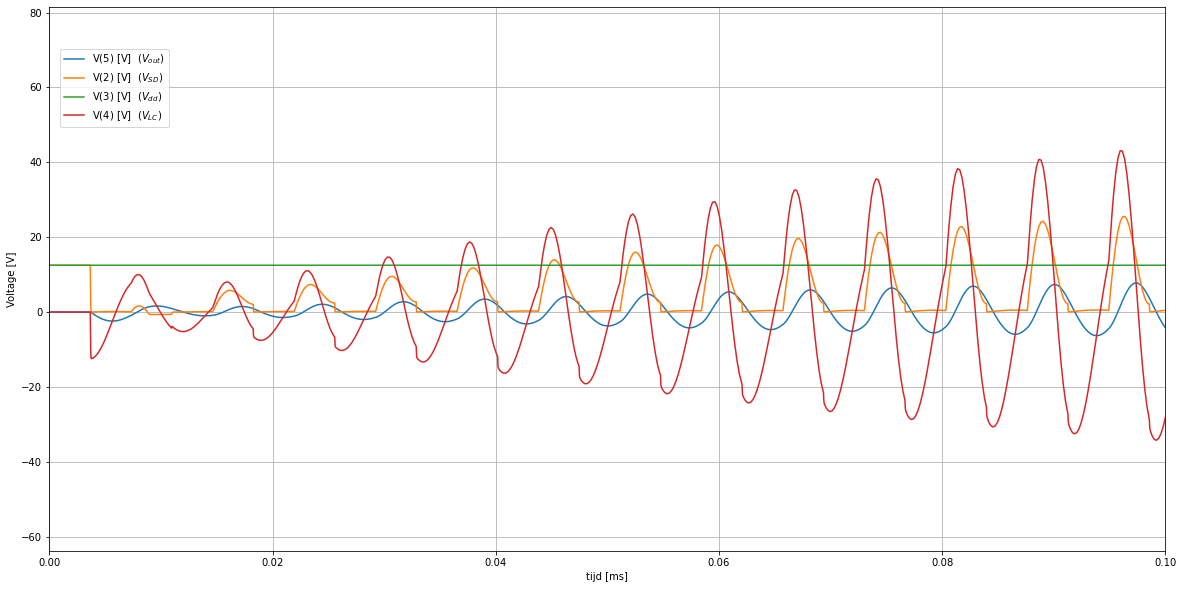

In [173]:
figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis.time*1e3,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['4'],label='V(4) [V]  ($V_{LC}$)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [ms]')
ax.set_xlim(0,end_time*1e2)
ax.set_ylabel('Voltage [V]')
plt.show()

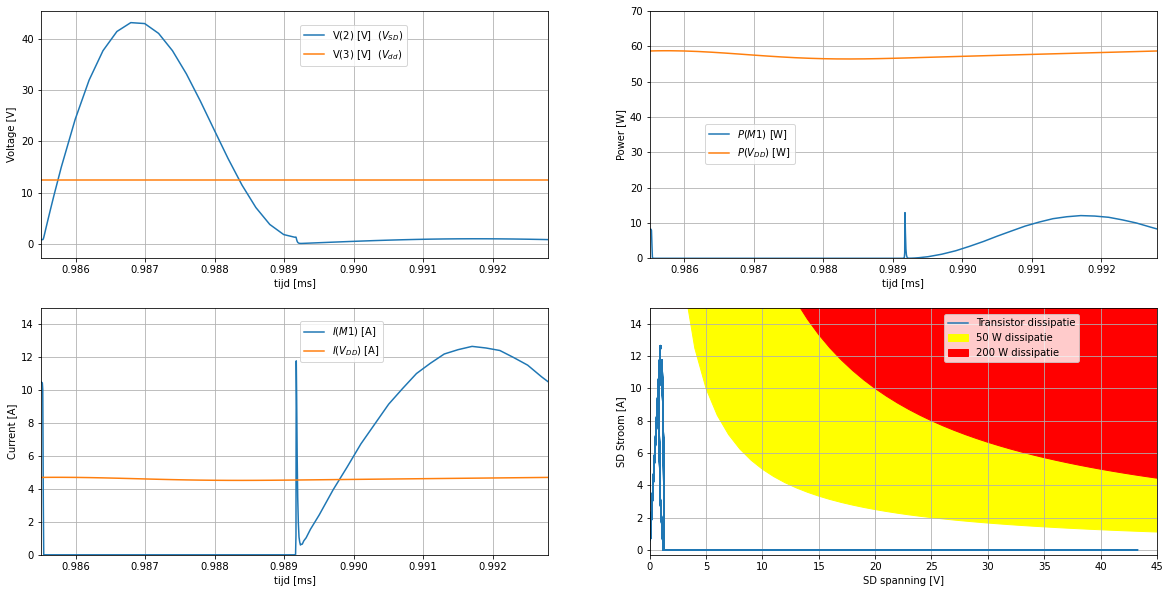

In [29]:
figure, ax = plt.subplots(2,2,figsize=(20, 10))
for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(direction='in')
        ax[i,j].grid()
ax[0,0].plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax[0,0].plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax[0,0].legend( loc=(0.51,.78))
ax[0,0].set_xlabel('tijd [ms]')
ax[0,0].set_xlim(end_time*135*7.3,end_time*136*7.3)
ax[0,0].set_ylabel('Voltage [V]')
ax[1,0].plot(analysis.time*1e3,analysis.internal_parameters['@m_m1[id]'],label='$I(M1)$ [A]' )
ax[1,0].plot(analysis.time*1e3,-analysis.branches['v_vdd'],label='$I(V_{DD})$ [A]' )
ax[1,0].legend( loc=(0.51,.78))
ax[1,0].set_xlabel('tijd [ms]')
ax[1,0].set_xlim(end_time*135*7.3,end_time*136*7.3)
ax[1,0].set_ylim(0,15)
ax[1,0].set_ylabel('Current [A]');
ax[0,1].plot(analysis.time*1e3,analysis.internal_parameters['@m_m1[id]']*analysis.nodes['2'],label='$P(M1)$ [W]' )
ax[0,1].plot(analysis.time*1e3,-analysis.branches['v_vdd']*analysis.nodes['3'],label='$P(V_{DD})$ [W]' )
#ax[0,1].plot(analysis.time*1e3,analysis.branches['l_l2']*analysis.nodes['5'],label='$P_{out}$ [W]' )
ax[0,1].legend( loc=(0.11,.38))
ax[0,1].set_xlabel('tijd [ms]')
ax[0,1].set_xlim(end_time*135*7.3,end_time*136*7.3)
ax[0,1].set_ylim(0,70)
ax[0,1].set_ylabel('Power [W]');
ax[1,1].plot(analysis.nodes['2'][9500:],analysis.internal_parameters['@m_m1[id]'][9500:],label='Transistor dissipatie' )
vref=np.arange(1,50,1)
ax[1,1].fill_between(vref,50/vref,200/vref,label='50 W dissipatie',color='yellow')
ax[1,1].fill_between(vref,200/vref,15+0*vref,label='200 W dissipatie',color='red')
ax[1,1].legend( loc=(0.58,.78))
ax[1,1].set_xlabel('SD spanning [V]')
ax[1,1].set_xlim(0,45)
ax[1,1].set_ylim(-0.3,15)
ax[1,1].set_ylabel('SD Stroom [A]');

### Voorbeeld 3: On-chip 2 GHz Klasse E versterker voor GSM toepassingen

In 1999 hebben King-Chun Tsai en Paul Gray een 1.9GHz klasse E versterker voor GSM en DECT telefoon toepassingen ontworpen {cite}`king-chuntsai9GHz1WCMOS1999`. De versterker bestaat uit 2 stages en elke stage is fully-differential uitgewerkt.

In de 2de stage herkenen we 2 gekruiste klasse E versterkers:
* L3 met de ingangscapaciteit van de complementaire transistor M23 die dan de kring L5 en C1 (5.1 pF) aanstuurt. De belasting is een 50 Ohm transmissielijn.
* L4 met de ingangscapaciteit van de complementaire transistor M22 die dan de kring L6 en C1 (5.1 pF) aanstuurt. De belasting is ook een 50 Ohm transmissielijn.

Hiervoor staat dan de eerste stage met ook 2 gekruiste klasse E versterkers:
* L1 met de ingangscapaciteit van de complementaire transistor M13 en de gate-source capaciteit van M21. Er is ook een seriekring als belasting, namelijk de gate-drian capaciteit van M21 in serie met onder andere L3. Deze seriekring is echter niet het beangrijkste. Het belangrijkste effect is spanningszwaai op de gate van M21, wat ook bekomen wordt zonder de seriekring.
* L2 met de ingangscapaciteit van de complementaire transistor M12 en de gate-source capaciteit van M24. Er is ook een seriekring als belasting, namelijk de gate-drian capaciteit van M24 in serie met onder andere L4. Deze seriekring is echter niet het beangrijkste. Het belangrijkste effect is spanningszwaai op de gate van M24, wat ook bekomen wordt zonder de seriekring.


Het uiteindelijke schema zie je in {numref}`schema %s <Tsai_schema>`

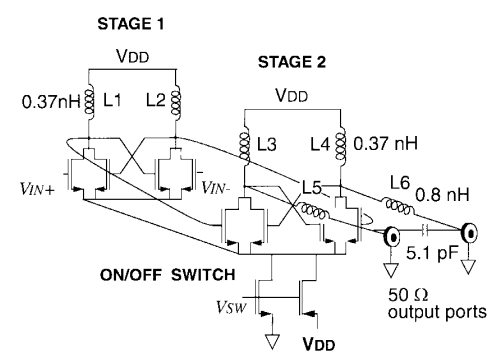

In [3]:
display.Image("./images/Tsai.png")

We kunnen dit schema uitwerken als een spice file (zie {numref}`eSpiceTsai`) en deze spice file simuleren.

```{literalinclude} ./simul/classE-Tsai.sp
:language: spice
:name: eSpiceTsai
:caption: Klasse E spice file met injection locking
```

In [5]:
display.Code(filename="simul/classE-Tsai.sp", language='spice') 

* Class E Tsai
M_SWn        0 11 10 0 nmos W=31580u L=0.35u
M_SWp        3 11 10 3 pmos W=500u L=0.35u
* stage 1
L_L1         3 6  0.37nH
L_L2         3 7  0.37nH
M_11         10 1 6 0 nmos W=980u L=0.35u
M_12         10 7 6 0 nmos W=980u L=0.35u
M_13         10 6 7 0 nmos W=980u L=0.35u
M_14         10 2 7 0 nmos W=980u L=0.35u
* stage 2
M_21         10 6 8 0 nmos W=3600u L=0.35u
M_22         10 9 8 0 nmos W=4800u L=0.35u
M_23         10 8 9 0 nmos W=4800u L=0.35u
M_24         10 7 9 0 nmos W=3600u L=0.35u
L_L3         3 8  0.37nH
L_L4         3 9  0.37nH
L_L5         8 4  0.8nH 
L_L6         9 5  0.8nH 
C_C1         4 5  5.1pF
* belasting
R_RL1        4 0  50 
R_RL2        5 0  50 
.include simul/berkeley35.lib

Het circuit is uitgevoerd in een 0.35 $\mu$m technologie. Normaal kan deze technologie gebruik maken van 5V voedingsspanning. Toch gebruiken we dit circuit met een voedingsspanning tussen de 1V en 2V. Dit is omdat er door de oscillatie hogere gate-spanningen worden bekomen en de maximale spanning over de gate is 5V.

In [ ]:
circuit=SpiceParser(path='simul/classE-Tsai.sp').build_circuit()
# parameters
freqentie,vdd,input_amplitude=2e9,2,2

period=1/freqentie
end_time=20*period

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
circuit.PulseVoltageSource('Vinp', '1', '0', 0, input_amplitude, pulse_width=period/2, period=period, delay_time=2.5*period, rise_time=10@u_ps, fall_time=10@u_ps)
circuit.PulseVoltageSource('Vinn', '2', '0', 0, input_amplitude, pulse_width=period/2, period=period, delay_time=2*period, rise_time=10@u_ps, fall_time=10@u_ps)
circuit.VoltageSource('Vdd','3','0',dc_value=vdd)  
circuit.PieceWiseLinearVoltageSource( 'VSW', '11', '0',values=[(0, 0), (1@u_ns, 0), (1.2@u_ns, vdd)],dc=0)
simulator.save_currents="I1"
analysis = simulator.transient(step_time=2e-12, end_time=end_time)

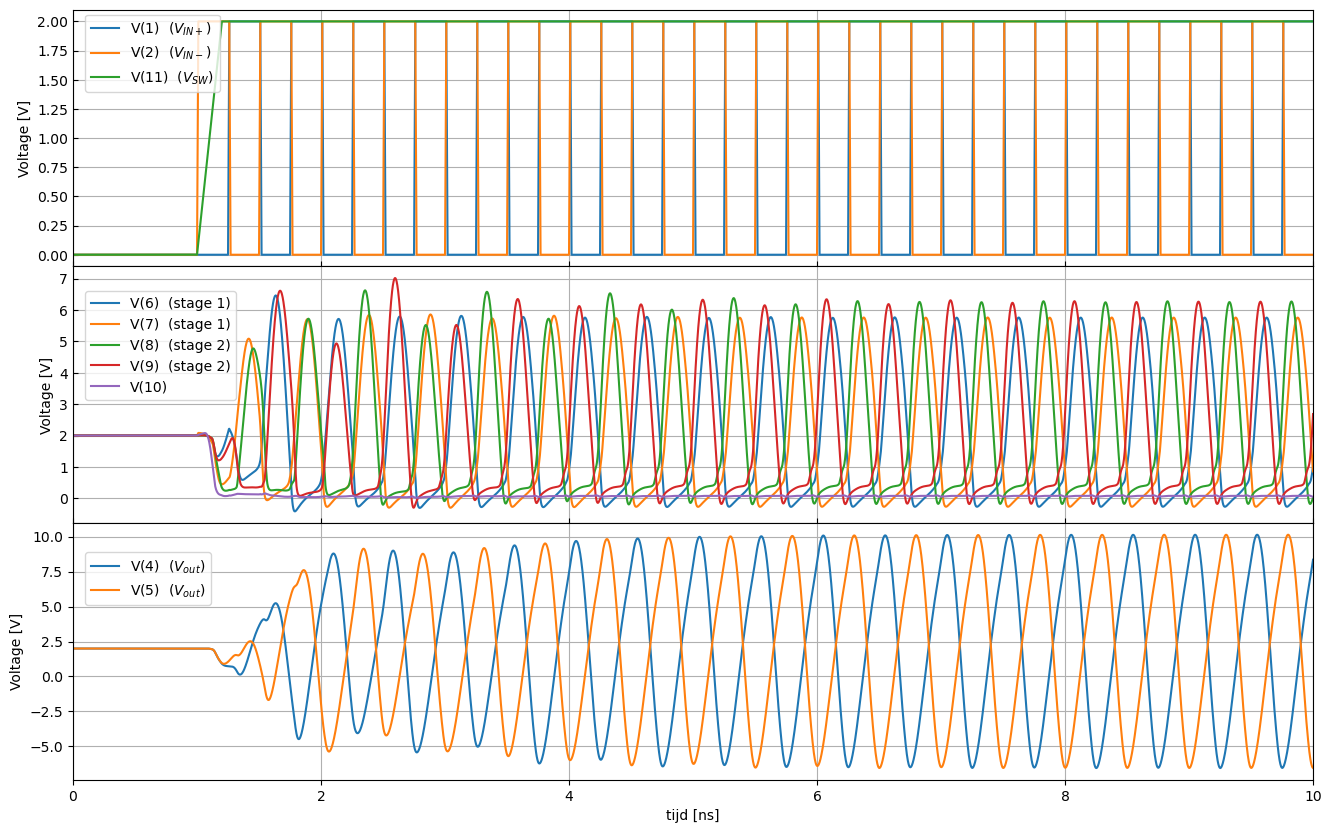

In [20]:
fig, ax = plt.subplots(3,figsize=(16, 10),sharex=True)
fig.subplots_adjust(hspace=0)
ax[0].tick_params(direction='in')
ax[1].tick_params(direction='in')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label='V(1)  ($V_{IN+}$)' )
ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label='V(2)  ($V_{IN-}$)' )
ax[0].plot(analysis.time*1e9,analysis.nodes['11'],label='V(11)  ($V_{SW}$)' )
ax[0].legend( loc=(0.01,.68))
ax[0].set_xlim(0,end_time*1e9)
ax[0].grid()
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['6'],label='V(6)  (stage 1)' )
ax[1].plot(analysis.time*1e9,analysis.nodes['7'],label='V(7)  (stage 1)' )
ax[1].plot(analysis.time*1e9,analysis.nodes['8'],label='V(8)  (stage 2)' )
ax[1].plot(analysis.time*1e9,analysis.nodes['9'],label='V(9)  (stage 2)' )
ax[1].plot(analysis.time*1e9,analysis.nodes['10'],label='V(10)' )
ax[1].legend( loc=(0.01,.48))
ax[1].grid()
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Voltage [V]')

ax[2].plot(analysis.time*1e9,analysis.nodes['4'],label='V(4)  ($V_{out}$)' )
ax[2].plot(analysis.time*1e9,analysis.nodes['5'],label='V(5)  ($V_{out}$)' )
ax[2].legend( loc=(0.01,.68))
ax[2].grid()
ax[2].set_xlim(0,end_time*1e9)
ax[2].set_ylabel('Voltage [V]')
ax[2].set_xlabel('tijd [ns]');

{numref}`esimTsai` toont de eerste 20 periodes uit de simulatie van het circuit. We merken op dat na ongeveer 10 periodes de uitgangssignalen in fase gaan lopen met de ingangssignalen. 

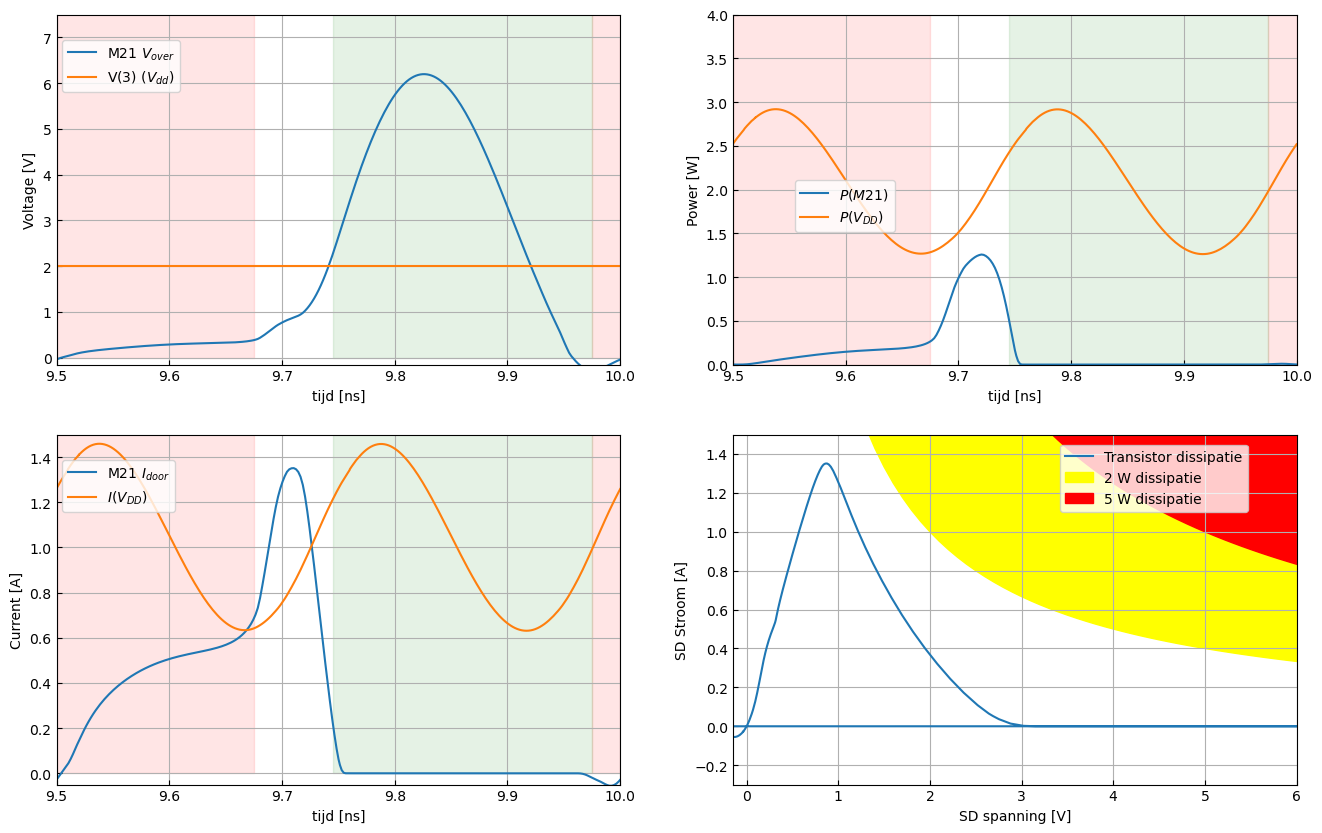

In [21]:
figure, ax = plt.subplots(2,2,figsize=(16, 10))
lastperiod=np.argmax(np.array(analysis.time) > (end_time-period))
plot_start_time,plot_end_time,plot_period=(end_time-period)*1e9,end_time*1e9,period*1e9
for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(direction='in')
        ax[i,j].grid()
        if i==0 or j==0:
            ax[i,j].fill_between(x=[plot_start_time,plot_start_time+0.35*plot_period],y1=[20,20],color='red',alpha=0.1)
            ax[i,j].fill_between(x=[plot_end_time-0.05*plot_period,plot_end_time],y1=[20,20],color='red',alpha=0.1)
            ax[i,j].fill_between(x=[plot_start_time+0.49*plot_period,plot_end_time-0.05*plot_period],y1=[20,20],color='green',alpha=0.1)

ax[0,0].plot(analysis.time*1e9,analysis.nodes['8']-analysis.nodes['10'],label='M21 $V_{over}$'  )
ax[0,0].plot(analysis.time*1e9,analysis.nodes['3'],label='V(3) ($V_{dd}$)' )
ax[0,0].legend( loc=(0.01,.78))
ax[0,0].set_xlabel('tijd [ns]')
ax[0,0].set_xlim(plot_start_time,plot_end_time) 
ax[0,0].set_ylim(-0.15,7.5)
ax[0,0].set_ylabel('Voltage [V]')
ax[1,0].plot(analysis.time*1e9,-analysis.internal_parameters['@m_21[id]'],label='M21 $I_{door}$'  )
ax[1,0].plot(analysis.time*1e9,-analysis.branches['vvdd'],label='$I(V_{DD})$' )
ax[1,0].legend( loc=(0.01,.78))
ax[1,0].set_xlabel('tijd [ns]')
ax[1,0].set_xlim(plot_start_time,plot_end_time)  
ax[1,0].set_ylim(-0.05,1.5)
ax[1,0].set_ylabel('Current [A]');

ax[0,1].plot(analysis.time*1e9,-analysis.internal_parameters['@m_21[id]']*(analysis.nodes['8']-analysis.nodes['10']),label='$P(M21)$' )
ax[0,1].plot(analysis.time*1e9,-analysis.branches['vvdd']*analysis.nodes['3'],label='$P(V_{DD})$' )
ax[0,1].legend( loc=(0.11,.38))
ax[0,1].set_xlabel('tijd [ns]')
ax[0,1].set_xlim(plot_start_time,plot_end_time)
ax[0,1].set_ylim(0,4)
ax[0,1].set_ylabel('Power [W]');

ax[1,1].plot(analysis.nodes['8'][lastperiod:]-analysis.nodes['10'][lastperiod:],-analysis.internal_parameters['@m_21[id]'][lastperiod:],label='Transistor dissipatie' )
vref=np.arange(0.1,7,0.1)
ax[1,1].fill_between(vref,2/vref,5/vref,label='2 W dissipatie',color='yellow')
ax[1,1].fill_between(vref,5/vref,4+0*vref,label='5 W dissipatie',color='red')
ax[1,1].legend( loc=(0.58,.78))
ax[1,1].set_xlabel('SD spanning [V]')
ax[1,1].set_xlim(-0.15,6)
ax[1,1].set_ylim(-0.3,1.5)
ax[1,1].set_ylabel('SD Stroom [A]');

{numref}`eTsaiM21` gaat dieper in op de input transistor (M21) van stage 2. We herkennen de gebieden zonder stroom en met veel spanning over de transistor (groene achtergrond) en de gebieden met veel stroom en een beperkte spanning over de transistor (rode achtergrond). Toch is er ook een gebied waarin we zowel hoge stromen als hoge spanningen bekomen (witte achtergrond), In dit gebied hebben we dus geen perfecte klasse E werking. De tweede input transistor van stage 2 (M24) gedraagt zich op dezelfde wijze.
{numref}`eTsaiM22` toont hetzelfde voor de kruisgekoppelde transistor (M22) van stage 2. Hier kunnen we wel de totale periode opdelen in de 2 gebieden die de Klasse E kenmerken. De tweede kruisgekoppelde transistor van stage 2 (M23) gedraagt zich op dezelfde wijze.

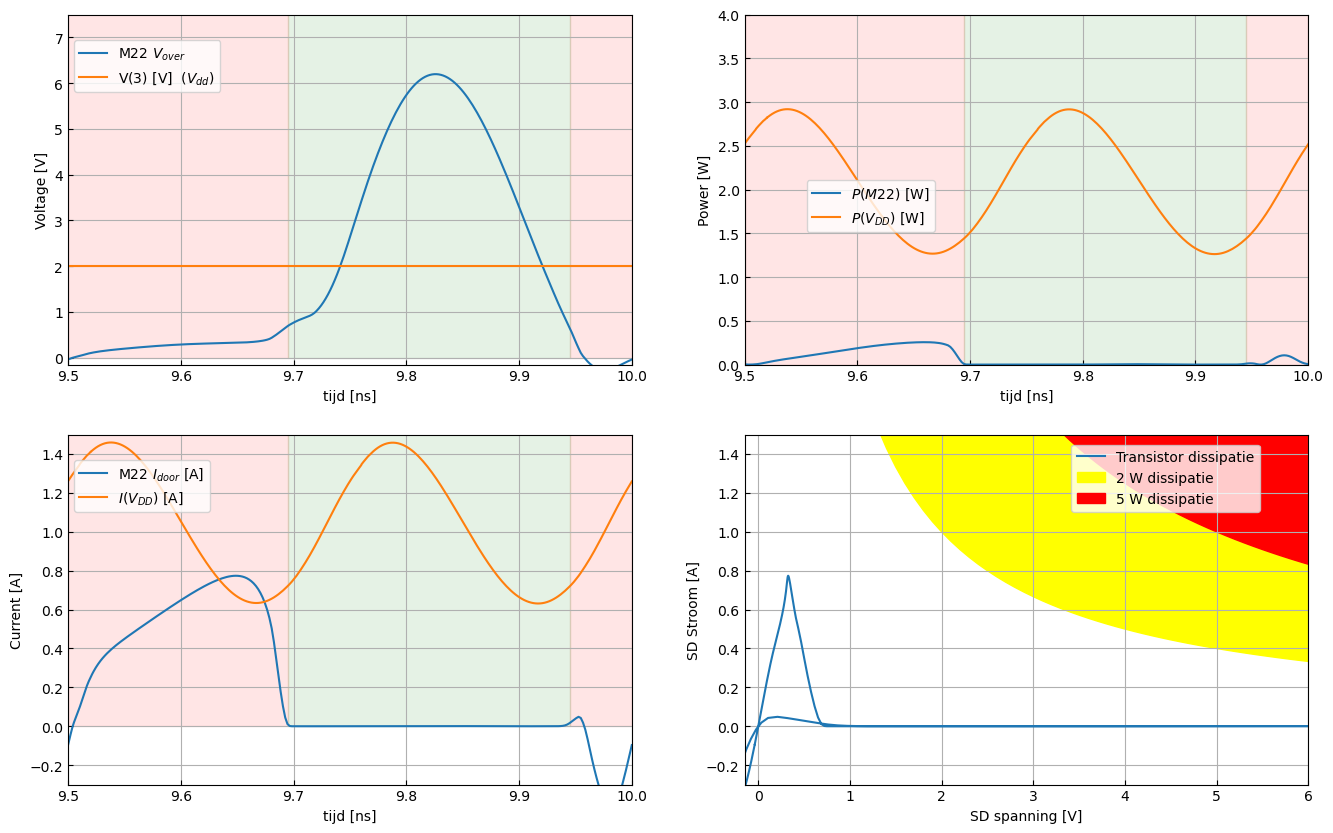

In [22]:
figure, ax = plt.subplots(2,2,figsize=(16, 10))
lastperiod=np.argmax(np.array(analysis.time) > (end_time-period))
plot_start_time,plot_end_time,plot_period=(end_time-period)*1e9,end_time*1e9,period*1e9
for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(direction='in')
        ax[i,j].grid()
        if i==0 or j==0:
            ax[i,j].fill_between(x=[plot_start_time,plot_start_time+0.39*plot_period],y1=[20,20],color='red',alpha=0.1)
            ax[i,j].fill_between(x=[plot_end_time-0.11*plot_period,plot_end_time],y1=[20,20],color='red',alpha=0.1)
            ax[i,j].fill_between(x=[plot_start_time+0.39*plot_period,plot_end_time-0.11*plot_period],y1=[20,20],color='green',alpha=0.1)

ax[0,0].plot(analysis.time*1e9,analysis.nodes['8']-analysis.nodes['10'],label='M22 $V_{over}$'  )
ax[0,0].plot(analysis.time*1e9,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax[0,0].legend( loc=(0.01,.78))
ax[0,0].set_xlabel('tijd [ns]')
ax[0,0].set_xlim(plot_start_time,plot_end_time) 
ax[0,0].set_ylim(-0.15,7.5)
ax[0,0].set_ylabel('Voltage [V]')
ax[1,0].plot(analysis.time*1e9,-analysis.internal_parameters['@m_22[id]'],label='M22 $I_{door}$ [A]'  )
ax[1,0].plot(analysis.time*1e9,-analysis.branches['vvdd'],label='$I(V_{DD})$ [A]' )
ax[1,0].legend( loc=(0.01,.78))
ax[1,0].set_xlabel('tijd [ns]')
ax[1,0].set_xlim(plot_start_time,plot_end_time)  
ax[1,0].set_ylim(-0.3,1.5)
ax[1,0].set_ylabel('Current [A]');

ax[0,1].plot(analysis.time*1e9,-analysis.internal_parameters['@m_22[id]']*(analysis.nodes['8']-analysis.nodes['10']),label='$P(M22)$ [W]' )
ax[0,1].plot(analysis.time*1e9,-analysis.branches['vvdd']*analysis.nodes['3'],label='$P(V_{DD})$ [W]' )
ax[0,1].legend( loc=(0.11,.38))
ax[0,1].set_xlabel('tijd [ns]')
ax[0,1].set_xlim(plot_start_time,plot_end_time)
ax[0,1].set_ylim(0,4)
ax[0,1].set_ylabel('Power [W]');
ax[1,1].plot(analysis.nodes['8'][lastperiod:]-analysis.nodes['10'][lastperiod:],-analysis.internal_parameters['@m_22[id]'][lastperiod:],label='Transistor dissipatie' )
vref=np.arange(0.1,7,0.1)
ax[1,1].fill_between(vref,2/vref,5/vref,label='2 W dissipatie',color='yellow')
ax[1,1].fill_between(vref,5/vref,4+0*vref,label='5 W dissipatie',color='red')
ax[1,1].legend( loc=(0.58,.78))
ax[1,1].set_xlabel('SD spanning [V]')
ax[1,1].set_xlim(-0.15,6)
ax[1,1].set_ylim(-0.3,1.5)
ax[1,1].set_ylabel('SD Stroom [A]');

## Overzicht van de state-of-the-art

In {numref}`esota` tonen we een overzicht van de state-of-the-art voor on chip klasse E versterkers. We merken op dat er vermogens tot 37 W kunnen bekomen worden met de 180 nm nodes. Voor de oudere 500 nm nodes kunnen er vermogens tot 100 W bekomen worden. Dit is vooral omdat er op de oudere technologienodes ook hogere spanningen kunnen gebruikt worden (tot 40V). 
De frequenties voor deze ontwerpen blijven beperkt tot 6 tot 13.56 MHz.

:::{list-table} Overzicht van de state-of-the-art
:header-rows: 1
:name: esota

* - 
  - ISSCC'18 {cite}`yeh70W90GaNbased2018`
  - ISSCC'19 {cite}`xie153100W912019`
  - ISSCC'24 {cite}`mao271DifferentialHybrid2024`
  - JSSC'24 {cite}`ma27WirelessPower2024`
  - ISSCC'25 {cite}`xiong678MHz942Peak2025`
  - ESSERC'25 [x]
* - Process node
  - 0.5 um
  - 0.5 um
  - 0.18 um
  - 0.18 um
  - 0.18 um
  - 0.18 um
* - Technologie
  - CMOS SOI
  - CMOS SOI
  - BCD
  - BCD SOI
  - SOI
  - BCD
* - Type
  - Klasse E
  - Differentiele klasse E
  - Hybride klasse ED
  - gereguleerde Klasse E
  - Klasse E
  - Klasse E
* - $V_{in}$ [V]
  - 40
  - 40
  - 7.4
  - 10
  - 20-35
  - 10-20
* - Frequentie [MHz]
  - 6.78
  - 13.56
  - 6.78
  - 6.78
  - 6.78
  - 6.78
* - Piek output power [W]
  - 70
  - 100
  - 27
  - 27
  - 33
  - 37.8
* - Piek Tx efficientie [%]
  - 90
  - 91
  - N.A.
  - N.A.
  - 94.2
  - 94
* - Piek E2E Efficientie [%]
  - N.A.
  - N.A.
  - 82
  - 80
  - 74.7
  - 86.3
:::

## Samenvatting en Conclusies

### Belangrijkste Eigenschappen van Klasse E Versterkers

De klasse E versterker biedt verschillende belangrijke voordelen:
* **Efficiëntie:**
  - Theoretisch tot 100% efficiëntie mogelijk
  - Praktisch 85-95% haalbaar
  - Ideaal voor batterij-gevoede toepassingen
* **Frequentiebereik:**
  - Optimaal voor hoogfrequent toepassingen (MHz-GHz)
  - Beperkte bandbreedte rond resonantiefrequentie
  - Geschikt voor narrowband communicatie
* **Implementatie:**
  - Eenvoudige topologie met één transistor
  - Kritische timing tussen spanning en stroom
  - Nauwkeurige componentwaarden vereist

### Toepassingsgebieden

* **Moderne Communicatiesystemen:**
  - GSM/UMTS/LTE zendversterkers
  - WiFi en Bluetooth transmitters
  - RFID en NFC systemen
  - Satellietcommunicatie
* **Vooruitblik:**
  - 5G millimeter-golf toepassingen
  - IoT low-power transmitters
  - Draadloze energieoverdracht
  - Geïntegreerde on-chip oplossingen